# Importing libraries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Collecting the data :

In [2]:
data1 = pd.read_csv("cars1.csv")
data2 = pd.read_csv("cars2.csv")
data3 = pd.read_csv("cars3.csv")
data4 = pd.read_csv("cars4.csv")
data5 = pd.read_csv("cars5.csv")
data6 = pd.read_csv("cars6.csv")
data7 = pd.read_csv("cars7.csv")
data8 = pd.read_csv("cars8.csv")
data9 = pd.read_csv("cars9.csv")
data10 = pd.read_csv("cars10.csv")
data11 = pd.read_csv("cars11.csv")
data12 = pd.read_csv("cars12.csv")
data13 = pd.read_csv("cars13.csv")

# Combining the data into a dataframe :

In [3]:
data = pd.concat([data1,data2,data3,data4,data5,data6,data7,data8,data9,data10,data11,data12,data13], axis = 0, ignore_index=True)
data.head()

Name   Brand                     Model  \
0          Swift VDI ABS MANUAL  Maruti            ['VDI', 'ABS']   
1              Swift ZDI MANUAL  Maruti                   ['ZDI']   
2  Baleno ALPHA DDIS 190 MANUAL  Maruti  ['ALPHA', 'DDIS', '190']   
3  Baleno ALPHA DDIS 190 MANUAL  Maruti  ['ALPHA', 'DDIS', '190']   
4    Baleno ZETA 1.2 K12 MANUAL  Maruti    ['ZETA', '1.2', 'K12']   

  Transmission Year of Purchase Kilometers Driven            Last Service  \
0       MANUAL           Mar-15         76,264 km  76,264km (22 Nov 2021)   
1       MANUAL           Jul-14         92,088 km  92,088km (08 Mar 2022)   
2       MANUAL           Jan-16         67,332 km  67,332km (16 Nov 2021)   
3       MANUAL           Nov-15         76,135 km  76,135km (07 Mar 2022)   
4       MANUAL           Mar-18         37,786 km  37,786km (09 Feb 2022)   

  Fuel Type      Owner                        Insurance         History  \
0    Diesel  1st Owner    Valid upto Mar 2023 3rd Party  Non-Accidental   
1    Diesel  1st Owner    Valid upto Mar 2023 3rd Party  Non-Accidental   
2    Diesel  1st Owner  Valid upto Jul 2022 Third Party  Non-Accidental   
3    Diesel  2nd Owner    Valid upto Mar 2023 3rd Party  Non-Accidental   
4    Petrol  1st Owner    Valid upto Mar 2023 3rd Party  Non-Accidental   

  Location  EMI per month      Price  
0    DELHI   ₹9,840/month  ₹4,26,499  
1    DELHI   ₹9,710/month  ₹4,20,799  
2    DELHI  ₹13,612/month  ₹5,92,199  
3    DELHI  ₹12,672/month  ₹5,50,899  
4    DELHI  ₹14,546/month  ₹6,33,199

Observation : Here we can see that there is a lot of preprocessing to be done in the data for the better model and accuracy.

In [4]:
data.columns

Index(['Name', 'Brand', 'Model', 'Transmission', 'Year of Purchase',
       'Kilometers Driven', 'Last Service', 'Fuel Type', 'Owner', 'Insurance',
       'History', 'Location', 'EMI per month', 'Price'],
      dtype='object')

In [5]:
data.shape

(7039, 14)

Observation : Here we can see that our model consists of 7039 rows and 14 columns

## Information of the data :

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7039 entries, 0 to 7038
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               7039 non-null   object
 1   Brand              7039 non-null   object
 2   Model              7039 non-null   object
 3   Transmission       6956 non-null   object
 4   Year of Purchase   7039 non-null   object
 5   Kilometers Driven  7039 non-null   object
 6   Last Service       7039 non-null   object
 7   Fuel Type          7039 non-null   object
 8   Owner              7039 non-null   object
 9   Insurance          7039 non-null   object
 10  History            7039 non-null   object
 11  Location           6498 non-null   object
 12  EMI per month      7039 non-null   object
 13  Price              7039 non-null   object
dtypes: object(14)
memory usage: 770.0+ KB


Observation : Here we can see that all the columns are with Object datatype and also we can see that the data has null values in few columns which we have fill during the preprocessing of the data.

## Null values of the data :

In [7]:
data.isnull().sum()

Name                   0
Brand                  0
Model                  0
Transmission          83
Year of Purchase       0
Kilometers Driven      0
Last Service           0
Fuel Type              0
Owner                  0
Insurance              0
History                0
Location             541
EMI per month          0
Price                  0
dtype: int64

Observation : Here we can see that the columns "Transmission" and "Location" have null values in them.

## Description of the data :

In [8]:
pd.set_option("display.max_columns",None)
data.describe()

Name   Brand    Model Transmission  \
count                          7039    7039     7039         6956   
unique                          781      24      669            2   
top     Baleno DELTA 1.2 K12 MANUAL  Maruti  ['VXI']       MANUAL   
freq                            241    3636      816         6024   

       Year of Purchase Kilometers Driven              Last Service Fuel Type  \
count              7039              7039                      7039      7039   
unique              256              4371                      4473         4   
top              Jan-14         36,696 km  1,12,006km (03 Jan 2022)    Petrol   
freq                167                 7                         7      4501   

            Owner                      Insurance         History Location  \
count        7039                           7039            7039     6498   
unique          4                             96               1       14   
top     1st Owner  Valid upto Mar 2023 3rd Party  Non-Accidental    DELHI   
freq         5610                           5032            7039     1853   

       EMI per month      Price  
count           7039       7039  
unique          2906       3170  
top         ₹0/month  ₹3,44,999  
freq             541         14

Observation : Here we can see the unique values,frequently repeated values of the columns and also we can observe that the statistical information of the data is not presented as all the columns are with object type of the data.

# Pre-processing of the columns required in the data :

## Name :

In [9]:
data["Name"]

0                        Swift VDI ABS MANUAL
1                            Swift ZDI MANUAL
2                Baleno ALPHA DDIS 190 MANUAL
3                Baleno ALPHA DDIS 190 MANUAL
4                  Baleno ZETA 1.2 K12 MANUAL
                        ...                  
7034                      Alto 800 LXI MANUAL
7035     Elite i20 1.2 MAGNA PLUS VTVT MANUAL
7036              maze 1.2 VXMT I VTEC MANUAL
7037       GRAND I10 NIOS MAGNA 1.2 MT MANUAL
7038        Grand i10 Sportz(O) 1.2 MT MANUAL
Name: Name, Length: 7039, dtype: object

In [10]:
x = data["Name"]

In [11]:
list0 = []
for i in x:
    list0.append(i.split(' ')[0])
print(list0)

['Swift', 'Swift', 'Baleno', 'Baleno', 'Baleno', 'Swift', 'Swift', 'Swift', 'Ciaz', 'Ciaz', 'Baleno', 'Ertiga', 'Baleno', 'Swift', 'Ciaz', 'Swift', 'Swift', 'Baleno', 'Ertiga', 'Alto', 'Swift', 'Swift', 'Swift', 'Ritz', 'Swift', 'Baleno', 'Baleno', 'Swift', 'Swift', 'Swift', 'Swift', 'Ciaz', 'Swift', 'Swift', 'Swift', 'Baleno', 'Swift', 'Baleno', 'Swift', 'Swift', 'Swift', 'Swift', 'Swift', 'Ciaz', 'Alto', 'Swift', 'Dzire', 'Baleno', 'Swift', 'Baleno', 'Swift', 'Baleno', 'Baleno', 'Swift', 'Swift', 'Alto', 'Baleno', 'Swift', 'Swift', 'Swift', 'Swift', 'Swift', 'Swift', 'Ritz', 'Swift', 'Baleno', 'Baleno', 'Swift', 'Swift', 'Swift', 'Swift', 'Ciaz', 'Swift', 'Swift', 'Swift', 'Baleno', 'Swift', 'Baleno', 'Swift', 'Swift', 'IGNIS', 'Swift', 'Swift', 'Ertiga', 'Swift', 'Alto', 'Swift', 'Swift', 'Swift', 'Swift', 'IGNIS', 'Swift', 'Swift', 'Ertiga', 'Swift', 'Swift', 'Swift', 'Ertiga', 'Baleno', 'Swift', 'Swift', 'Baleno', 'Swift', 'Swift', 'Baleno', 'Baleno', 'Swift', 'Swift', 'Swift', 'C

In [12]:
Name_of_the_car = list0

In [13]:
df = pd.DataFrame()
df["Name_of_the_car"] = list0
df

Name_of_the_car
0              Swift
1              Swift
2             Baleno
3             Baleno
4             Baleno
...              ...
7034            Alto
7035                
7036            maze
7037                
7038                

[7039 rows x 1 columns]

Observation : Here we can see that the splitting of the data is done and the data is turned into a dataframe.

In [14]:
Car_name = df

In [15]:
data.insert(len(data.columns),"Car_name",Car_name.values)

Observation : Here we have inserted the craeted column into the dataframe.

In [16]:
data.drop(['Name'],axis = 1,inplace = True)

Observation : Here we have dropped the parent column "Name".

In [17]:
data.head()

Brand                     Model Transmission Year of Purchase  \
0  Maruti            ['VDI', 'ABS']       MANUAL           Mar-15   
1  Maruti                   ['ZDI']       MANUAL           Jul-14   
2  Maruti  ['ALPHA', 'DDIS', '190']       MANUAL           Jan-16   
3  Maruti  ['ALPHA', 'DDIS', '190']       MANUAL           Nov-15   
4  Maruti    ['ZETA', '1.2', 'K12']       MANUAL           Mar-18   

  Kilometers Driven            Last Service Fuel Type      Owner  \
0         76,264 km  76,264km (22 Nov 2021)    Diesel  1st Owner   
1         92,088 km  92,088km (08 Mar 2022)    Diesel  1st Owner   
2         67,332 km  67,332km (16 Nov 2021)    Diesel  1st Owner   
3         76,135 km  76,135km (07 Mar 2022)    Diesel  2nd Owner   
4         37,786 km  37,786km (09 Feb 2022)    Petrol  1st Owner   

                         Insurance         History Location  EMI per month  \
0    Valid upto Mar 2023 3rd Party  Non-Accidental    DELHI   ₹9,840/month   
1    Valid upto Mar 2023 3rd Party  Non-Accidental    DELHI   ₹9,710/month   
2  Valid upto Jul 2022 Third Party  Non-Accidental    DELHI  ₹13,612/month   
3    Valid upto Mar 2023 3rd Party  Non-Accidental    DELHI  ₹12,672/month   
4    Valid upto Mar 2023 3rd Party  Non-Accidental    DELHI  ₹14,546/month   

       Price Car_name  
0  ₹4,26,499    Swift  
1  ₹4,20,799    Swift  
2  ₹5,92,199   Baleno  
3  ₹5,50,899   Baleno  
4  ₹6,33,199   Baleno

In [18]:
data.shape

(7039, 14)

In [19]:
data.columns

Index(['Brand', 'Model', 'Transmission', 'Year of Purchase',
       'Kilometers Driven', 'Last Service', 'Fuel Type', 'Owner', 'Insurance',
       'History', 'Location', 'EMI per month', 'Price', 'Car_name'],
      dtype='object')

# Year of Purchase :

In [20]:
yea = data["Year of Purchase"]

In [21]:
list1 = []
for j in yea:
    list1.append(j.strip(' ')[0:3])
print(list1)

['Mar', 'Jul', 'Jan', 'Nov', 'Mar', 'Nov', 'May', 'Aug', 'Jul', 'Aug', 'Jul', 'Jan', 'Sep', 'Jan', 'Jan', 'Mar', 'Jan', 'Jun', 'May', 'Feb', 'May', 'May', 'Aug', 'Nov', 'May', 'Feb', 'Mar', 'Oct', 'Feb', 'Mar', 'Jun', 'Mar', 'Oct', 'Jan', 'Apr', 'Nov', 'Jan', 'Aug', 'Jan', 'Nov', 'Oct', 'Nov', 'Jun', 'May', 'Jan', 'Dec', 'Oct', 'Feb', 'Jan', 'Sep', 'Feb', 'Apr', 'Oct', 'Apr', 'Jan', 'Jul', 'Apr', 'Dec', 'May', 'Apr', 'May', 'May', 'Aug', 'Nov', 'May', 'Feb', 'Mar', 'Oct', 'Feb', 'Mar', 'Jun', 'Mar', 'Oct', 'Jan', 'Apr', 'Nov', 'Jan', 'Aug', 'Jan', 'Nov', 'Sep', 'Oct', 'Jul', 'Dec', 'Nov', 'Jul', 'May', 'Jan', 'Nov', 'Sep', 'Mar', 'Feb', 'Apr', 'May', 'May', 'Mar', 'Aug', 'Apr', 'Apr', 'Mar', 'Oct', 'Mar', 'Jan', 'Jan', 'Nov', 'Feb', 'Mar', 'Jun', 'Feb', 'Mar', 'Oct', 'Aug', 'Apr', 'Feb', 'Jan', 'Aug', 'Feb', 'Apr', 'Jan', 'Nov', 'Dec', 'Feb', 'Nov', 'May', 'May', 'Sep', 'Jul', 'Nov', 'Jul', 'Feb', 'Aug', 'Sep', 'Nov', 'Aug', 'Jan', 'Mar', 'Jan', 'May', 'Jan', 'Aug', 'Jan', 'Jun', 'Jan'

In [22]:
Purchase_month = list1

In [23]:
df1 = pd.DataFrame()
df1["Purchase_month"] = list1
df1

Purchase_month
0               Mar
1               Jul
2               Jan
3               Nov
4               Mar
...             ...
7034            Feb
7035            Jan
7036            Sep
7037            Aug
7038            Feb

[7039 rows x 1 columns]

In [24]:
Purchase_month = df1
Purchase_month

Purchase_month
0               Mar
1               Jul
2               Jan
3               Nov
4               Mar
...             ...
7034            Feb
7035            Jan
7036            Sep
7037            Aug
7038            Feb

[7039 rows x 1 columns]

Observation : Here we have splitted the data and made into a dataframe.

In [25]:
list2 = []
for k in yea:
    list2.append(k.strip('')[-2:])
print(list2)

['15', '14', '16', '15', '18', '13', '17', '13', '15', '16', '16', '16', '16', '13', '15', '14', '14', '17', '14', '20', '17', '14', '14', '10', '14', '17', '18', '13', '14', '15', '14', '17', '14', '15', '15', '15', '17', '17', '15', '14', '14', '13', '17', '17', '20', '15', '17', '17', '13', '19', '15', '17', '18', '14', '14', '19', '17', '14', '13', '15', '17', '14', '14', '10', '14', '17', '18', '13', '14', '15', '14', '17', '14', '15', '15', '15', '17', '17', '15', '14', '17', '15', '13', '13', '13', '20', '13', '13', '14', '15', '18', '15', '15', '14', '14', '16', '18', '17', '16', '15', '13', '18', '17', '15', '15', '17', '15', '14', '14', '17', '14', '13', '17', '13', '15', '17', '13', '15', '15', '14', '15', '15', '13', '13', '17', '17', '15', '17', '14', '15', '14', '14', '15', '18', '18', '15', '17', '10', '14', '14', '19', '13', '13', '15', '16', '14', '15', '19', '13', '12', '13', '17', '17', '17', '14', '13', '18', '14', '16', '12', '14', '17', '14', '13', '17', '13', '15

In [26]:
purchase_year = list2

In [27]:
df2 = pd.DataFrame()
df2["purchase_year"] = list2
df2

purchase_year
0               15
1               14
2               16
3               15
4               18
...            ...
7034            19
7035            19
7036            20
7037            17
7038            18

[7039 rows x 1 columns]

In [28]:
Purchase_year = df2
Purchase_year

purchase_year
0               15
1               14
2               16
3               15
4               18
...            ...
7034            19
7035            19
7036            20
7037            17
7038            18

[7039 rows x 1 columns]

Observation : Also here we have extracted from the splitted data and turned into a dataframe.

In [29]:
data.insert(len(data.columns),"Purchase_month",Purchase_month.values)

In [30]:
data.insert(len(data.columns),"Purchase_year",Purchase_year.values)

Observation : Here we can see that we are inserting the created columns into the dataframe.

In [31]:
data.shape

(7039, 16)

In [32]:
data.drop(['Year of Purchase'],axis = 1,inplace = True)

Observation : Here we can see that we have dropped the parent column "Year of Purchase".

In [33]:
data.head()

Brand                     Model Transmission Kilometers Driven  \
0  Maruti            ['VDI', 'ABS']       MANUAL         76,264 km   
1  Maruti                   ['ZDI']       MANUAL         92,088 km   
2  Maruti  ['ALPHA', 'DDIS', '190']       MANUAL         67,332 km   
3  Maruti  ['ALPHA', 'DDIS', '190']       MANUAL         76,135 km   
4  Maruti    ['ZETA', '1.2', 'K12']       MANUAL         37,786 km   

             Last Service Fuel Type      Owner  \
0  76,264km (22 Nov 2021)    Diesel  1st Owner   
1  92,088km (08 Mar 2022)    Diesel  1st Owner   
2  67,332km (16 Nov 2021)    Diesel  1st Owner   
3  76,135km (07 Mar 2022)    Diesel  2nd Owner   
4  37,786km (09 Feb 2022)    Petrol  1st Owner   

                         Insurance         History Location  EMI per month  \
0    Valid upto Mar 2023 3rd Party  Non-Accidental    DELHI   ₹9,840/month   
1    Valid upto Mar 2023 3rd Party  Non-Accidental    DELHI   ₹9,710/month   
2  Valid upto Jul 2022 Third Party  Non-Accidental    DELHI  ₹13,612/month   
3    Valid upto Mar 2023 3rd Party  Non-Accidental    DELHI  ₹12,672/month   
4    Valid upto Mar 2023 3rd Party  Non-Accidental    DELHI  ₹14,546/month   

       Price Car_name Purchase_month Purchase_year  
0  ₹4,26,499    Swift            Mar            15  
1  ₹4,20,799    Swift            Jul            14  
2  ₹5,92,199   Baleno            Jan            16  
3  ₹5,50,899   Baleno            Nov            15  
4  ₹6,33,199   Baleno            Mar            18

# Kilometers Driven :

In [34]:
kms = data["Kilometers Driven"]

In [35]:
list3 = []
for l in kms:
    list3.append(l.split(" ")[0].replace(",",""))
print(list3)

['76264', '92088', '67332', '76135', '37786', '74447', '70112', '68749', '121025', '81877', '18164', '27611', '80392', '77263', '76530', '82367', '83937', '44193', '94820', '8235', '52121', '14734', '71382', '77787', '41996', '48259', '9610', '77409', '54884', '30528', '39011', '36696', '72310', '46856', '112006', '57394', '97591', '41963', '56552', '49216', '76551', '76608', '57256', '66396', '13235', '11026', '40587', '54588', '29449', '14221', '92086', '62781', '23091', '45750', '43064', '2691', '38216', '107206', '65561', '27651', '52121', '14734', '71382', '77787', '41996', '48259', '9610', '77409', '54884', '30528', '39011', '36696', '72310', '46856', '112006', '57394', '97591', '41963', '56552', '49216', '31885', '33242', '122416', '119146', '23673', '3219', '24652', '114506', '38070', '104093', '29026', '37925', '46168', '64013', '64127', '58818', '67139', '16930', '72334', '61499', '77409', '9610', '97591', '46856', '57394', '48259', '30528', '39011', '54884', '36696', '72310'

In [36]:
Kilometers_Driven = list3

In [37]:
df3 = pd.DataFrame()
df3["Kilometers_Driven"] = list3
df3

Kilometers_Driven
0                76264
1                92088
2                67332
3                76135
4                37786
...                ...
7034             16539
7035             31962
7036             15472
7037              6427
7038             35407

[7039 rows x 1 columns]

In [38]:
Kilometers_Driven = df3
Kilometers_Driven

Kilometers_Driven
0                76264
1                92088
2                67332
3                76135
4                37786
...                ...
7034             16539
7035             31962
7036             15472
7037              6427
7038             35407

[7039 rows x 1 columns]

Observation : Here we have splitted the data and created the dataframe.

In [39]:
data.insert(len(data.columns),"Kilometers_Driven",Kilometers_Driven.values)

Observation : Here we have inserted the created column into the dataframe.

In [40]:
data.drop(['Kilometers Driven'],axis = 1,inplace = True)

Observation : Here we have dropped the parent column "Kilometers Driven" .

In [41]:
data.head()

Brand                     Model Transmission            Last Service  \
0  Maruti            ['VDI', 'ABS']       MANUAL  76,264km (22 Nov 2021)   
1  Maruti                   ['ZDI']       MANUAL  92,088km (08 Mar 2022)   
2  Maruti  ['ALPHA', 'DDIS', '190']       MANUAL  67,332km (16 Nov 2021)   
3  Maruti  ['ALPHA', 'DDIS', '190']       MANUAL  76,135km (07 Mar 2022)   
4  Maruti    ['ZETA', '1.2', 'K12']       MANUAL  37,786km (09 Feb 2022)   

  Fuel Type      Owner                        Insurance         History  \
0    Diesel  1st Owner    Valid upto Mar 2023 3rd Party  Non-Accidental   
1    Diesel  1st Owner    Valid upto Mar 2023 3rd Party  Non-Accidental   
2    Diesel  1st Owner  Valid upto Jul 2022 Third Party  Non-Accidental   
3    Diesel  2nd Owner    Valid upto Mar 2023 3rd Party  Non-Accidental   
4    Petrol  1st Owner    Valid upto Mar 2023 3rd Party  Non-Accidental   

  Location  EMI per month      Price Car_name Purchase_month Purchase_year  \
0    DELHI   ₹9,840/month  ₹4,26,499    Swift            Mar            15   
1    DELHI   ₹9,710/month  ₹4,20,799    Swift            Jul            14   
2    DELHI  ₹13,612/month  ₹5,92,199   Baleno            Jan            16   
3    DELHI  ₹12,672/month  ₹5,50,899   Baleno            Nov            15   
4    DELHI  ₹14,546/month  ₹6,33,199   Baleno            Mar            18   

  Kilometers_Driven  
0             76264  
1             92088  
2             67332  
3             76135  
4             37786

# Last Service :

In [42]:
service= data["Last Service"].str.split( '(' )

In [43]:
list4=[]
for m in range(len(service)):
    print(service[m][1][:-1])
    list4 += [service[m][1][:-1]]
print(list4)

22 Nov 2021
08 Mar 2022
16 Nov 2021
07 Mar 2022
09 Feb 2022
17 Feb 2022
02 Feb 2022
27 Nov 2021
18 Feb 2022
14 Mar 2022
23 Feb 2022
11 Mar 2022
07 Feb 2022
08 Mar 2022
12 Mar 2022
20 Nov 2021
23 Feb 2022
07 Mar 2022
02 Feb 2022
17 Feb 2022
08 Mar 2022
24 Nov 2021
28 Feb 2022
24 Feb 2022
01 Nov 2021
01 Mar 2022
03 Feb 2022
01 Mar 2022
30 Dec 2021
22 Feb 2022
01 Mar 2022
29 Jan 2022
21 Feb 2022
07 Mar 2022
03 Jan 2022
16 Mar 2022
10 Mar 2022
07 Jan 2022
19 Jan 2022
12 Jan 2022
16 Feb 2022
29 Jan 2022
10 Mar 2022
09 Nov 2021
08 Feb 2022
13 Jan 2022
23 Feb 2022
21 Feb 2022
26 Feb 2022
21 Feb 2022
03 Feb 2022
08 Mar 2022
07 Feb 2022
22 Feb 2022
18 Feb 2022
22 Feb 2022
15 Feb 2022
24 Dec 2021
21 Feb 2022
10 Feb 2022
08 Mar 2022
24 Nov 2021
28 Feb 2022
24 Feb 2022
01 Nov 2021
01 Mar 2022
03 Feb 2022
01 Mar 2022
30 Dec 2021
22 Feb 2022
01 Mar 2022
29 Jan 2022
21 Feb 2022
07 Mar 2022
03 Jan 2022
16 Mar 2022
10 Mar 2022
07 Jan 2022
19 Jan 2022
12 Jan 2022
12 Mar 2022
31 Jan 2022
15 Nov 2021
03 M

In [44]:
service = list4

In [45]:
df4 = pd.DataFrame()
df4["service"] = list4
df4

service
0     22 Nov 2021
1     08 Mar 2022
2     16 Nov 2021
3     07 Mar 2022
4     09 Feb 2022
...           ...
7034  24 Dec 2021
7035  01 Mar 2022
7036  21 Dec 2021
7037  21 Dec 2021
7038  11 Jan 2022

[7039 rows x 1 columns]

In [46]:
service = df4
service

service
0     22 Nov 2021
1     08 Mar 2022
2     16 Nov 2021
3     07 Mar 2022
4     09 Feb 2022
...           ...
7034  24 Dec 2021
7035  01 Mar 2022
7036  21 Dec 2021
7037  21 Dec 2021
7038  11 Jan 2022

[7039 rows x 1 columns]

Observation : Here we have splitted the data and converted that into a dataframe

In [47]:
data.insert(len(data.columns),"service",service.values)

Observation : Here we have inserted the column into the dataframe.

In [48]:
data.drop(['Last Service'],axis = 1,inplace = True)

Observation : Here we can see that we can see that we have dropped the parent column "Last Service".

In [49]:
data.head()

Brand                     Model Transmission Fuel Type      Owner  \
0  Maruti            ['VDI', 'ABS']       MANUAL    Diesel  1st Owner   
1  Maruti                   ['ZDI']       MANUAL    Diesel  1st Owner   
2  Maruti  ['ALPHA', 'DDIS', '190']       MANUAL    Diesel  1st Owner   
3  Maruti  ['ALPHA', 'DDIS', '190']       MANUAL    Diesel  2nd Owner   
4  Maruti    ['ZETA', '1.2', 'K12']       MANUAL    Petrol  1st Owner   

                         Insurance         History Location  EMI per month  \
0    Valid upto Mar 2023 3rd Party  Non-Accidental    DELHI   ₹9,840/month   
1    Valid upto Mar 2023 3rd Party  Non-Accidental    DELHI   ₹9,710/month   
2  Valid upto Jul 2022 Third Party  Non-Accidental    DELHI  ₹13,612/month   
3    Valid upto Mar 2023 3rd Party  Non-Accidental    DELHI  ₹12,672/month   
4    Valid upto Mar 2023 3rd Party  Non-Accidental    DELHI  ₹14,546/month   

       Price Car_name Purchase_month Purchase_year Kilometers_Driven  \
0  ₹4,26,499    Swift            Mar            15             76264   
1  ₹4,20,799    Swift            Jul            14             92088   
2  ₹5,92,199   Baleno            Jan            16             67332   
3  ₹5,50,899   Baleno            Nov            15             76135   
4  ₹6,33,199   Baleno            Mar            18             37786   

       service  
0  22 Nov 2021  
1  08 Mar 2022  
2  16 Nov 2021  
3  07 Mar 2022  
4  09 Feb 2022

# Owner :

In [50]:
own = data["Owner"]

In [51]:
list5 = []
for n in own:
    list5.append(n.strip(" ")[0])
print(list5)

['1', '1', '1', '2', '1', '1', '1', '1', '2', '1', '2', '2', '1', '2', '1', '2', '1', '1', '2', '1', '1', '2', '1', '2', '1', '2', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '1', '1', '1', '2', '1', '1', '1', '3', '1', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '1', '2', '1', '2', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '3', '1', '1', '3', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '2', '1', '2', '1', '1', '1', '2', '1', '1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '1', '2', '1', '1', '1', '1', '2', '1', '1', '1', '2', '1', '1', '1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '1', '1', '2', '1', '1', '2', '1', '1', '1', '3', '2', '1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '2', '2', '1', '1', '1', '1', '1', '1', '1', '1',

In [52]:
owner = list5

In [53]:
df4 = pd.DataFrame()
df4["owner"] = list5
df4

owner
0        1
1        1
2        1
3        2
4        1
...    ...
7034     2
7035     1
7036     1
7037     1
7038     1

[7039 rows x 1 columns]

In [54]:
owner = df4
owner

owner
0        1
1        1
2        1
3        2
4        1
...    ...
7034     2
7035     1
7036     1
7037     1
7038     1

[7039 rows x 1 columns]

Observation : Here we have splitted the data and converted into a dataframe.

In [55]:
data.insert(len(data.columns),"owner",owner.values)

Observation : Here we have inserted the created column into the dataframe.

In [56]:
data.drop(['Owner'],axis = 1,inplace = True)

Observation : Here we have dropped the parent column "Owner".

In [57]:
data.head()

Brand                     Model Transmission Fuel Type  \
0  Maruti            ['VDI', 'ABS']       MANUAL    Diesel   
1  Maruti                   ['ZDI']       MANUAL    Diesel   
2  Maruti  ['ALPHA', 'DDIS', '190']       MANUAL    Diesel   
3  Maruti  ['ALPHA', 'DDIS', '190']       MANUAL    Diesel   
4  Maruti    ['ZETA', '1.2', 'K12']       MANUAL    Petrol   

                         Insurance         History Location  EMI per month  \
0    Valid upto Mar 2023 3rd Party  Non-Accidental    DELHI   ₹9,840/month   
1    Valid upto Mar 2023 3rd Party  Non-Accidental    DELHI   ₹9,710/month   
2  Valid upto Jul 2022 Third Party  Non-Accidental    DELHI  ₹13,612/month   
3    Valid upto Mar 2023 3rd Party  Non-Accidental    DELHI  ₹12,672/month   
4    Valid upto Mar 2023 3rd Party  Non-Accidental    DELHI  ₹14,546/month   

       Price Car_name Purchase_month Purchase_year Kilometers_Driven  \
0  ₹4,26,499    Swift            Mar            15             76264   
1  ₹4,20,799    Swift            Jul            14             92088   
2  ₹5,92,199   Baleno            Jan            16             67332   
3  ₹5,50,899   Baleno            Nov            15             76135   
4  ₹6,33,199   Baleno            Mar            18             37786   

       service owner  
0  22 Nov 2021     1  
1  08 Mar 2022     1  
2  16 Nov 2021     1  
3  07 Mar 2022     2  
4  09 Feb 2022     1

# Insurance :

In [58]:
ins = data["Insurance"]

In [59]:
list5 = []   ## insurance year
for p in ins:
    list5.append(p.split(" ")[2:4][1])
print(list5)

['2023', '2023', '2022', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2022', '2023', '2022', '2023', '2023', '2023', '2023', '2023', '2022', '2023', '2023', '2023', '2023', '2022', '2023', '2023', '2023', '2022', '2023', '2023', '2023', '2023', '2023', '2022', '2023', '2022', '2023', '2023', '2022', '2023', '2023', '2023', '2023', '2023', '2022', '2023', '2023', '2022', '2023', '2023', '2023', '2023', '2023', '2022', '2023', '2023', '2023', '2023', '2022', '2023', '2023', '2023', '2023', '2022', '2023', '2023', '2023', '2022', '2023', '2023', '2023', '2023', '2023', '2022', '2023', '2022', '2023', '2023', '2022', '2022', '2023', '2023', '2022', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2022', '2022', '2022', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2022', '2023', '2023', '2023', '2023', '2022', '2023', '2023', '2023', '2023',

In [60]:
Year_of_insurance = list5

In [61]:
df5 = pd.DataFrame()
df5["Year_of_insurance"] = list5
df5

Year_of_insurance
0                 2023
1                 2023
2                 2022
3                 2023
4                 2023
...                ...
7034              2023
7035              2023
7036              2023
7037              2023
7038              2022

[7039 rows x 1 columns]

In [62]:
Year_of_insurance = df5
Year_of_insurance

Year_of_insurance
0                 2023
1                 2023
2                 2022
3                 2023
4                 2023
...                ...
7034              2023
7035              2023
7036              2023
7037              2023
7038              2022

[7039 rows x 1 columns]

Observation : Here we have splitted the data and converted that into a dataframe.

In [63]:
data.insert(len(data.columns),"Year_of_insurance",Year_of_insurance.values)

Observation : Here we have seen that the created column is inserted into the dataframe.

In [64]:
data.head()

Brand                     Model Transmission Fuel Type  \
0  Maruti            ['VDI', 'ABS']       MANUAL    Diesel   
1  Maruti                   ['ZDI']       MANUAL    Diesel   
2  Maruti  ['ALPHA', 'DDIS', '190']       MANUAL    Diesel   
3  Maruti  ['ALPHA', 'DDIS', '190']       MANUAL    Diesel   
4  Maruti    ['ZETA', '1.2', 'K12']       MANUAL    Petrol   

                         Insurance         History Location  EMI per month  \
0    Valid upto Mar 2023 3rd Party  Non-Accidental    DELHI   ₹9,840/month   
1    Valid upto Mar 2023 3rd Party  Non-Accidental    DELHI   ₹9,710/month   
2  Valid upto Jul 2022 Third Party  Non-Accidental    DELHI  ₹13,612/month   
3    Valid upto Mar 2023 3rd Party  Non-Accidental    DELHI  ₹12,672/month   
4    Valid upto Mar 2023 3rd Party  Non-Accidental    DELHI  ₹14,546/month   

       Price Car_name Purchase_month Purchase_year Kilometers_Driven  \
0  ₹4,26,499    Swift            Mar            15             76264   
1  ₹4,20,799    Swift            Jul            14             92088   
2  ₹5,92,199   Baleno            Jan            16             67332   
3  ₹5,50,899   Baleno            Nov            15             76135   
4  ₹6,33,199   Baleno            Mar            18             37786   

       service owner Year_of_insurance  
0  22 Nov 2021     1              2023  
1  08 Mar 2022     1              2023  
2  16 Nov 2021     1              2022  
3  07 Mar 2022     2              2023  
4  09 Feb 2022     1              2023

In [65]:
list6 = []   
for q in ins:
    list6.append(q.split(" ")[2:4][0])
print(list6)

['Mar', 'Mar', 'Jul', 'Mar', 'Mar', 'Mar', 'Mar', 'Mar', 'Mar', 'Mar', 'Mar', 'Mar', 'Sept', 'Mar', 'Sept', 'Mar', 'Mar', 'Mar', 'Mar', 'Mar', 'Aug', 'Mar', 'Mar', 'Mar', 'Mar', 'Sept', 'Mar', 'Mar', 'Mar', 'Jul', 'Mar', 'Mar', 'Mar', 'Mar', 'Mar', 'Dec', 'Mar', 'Nov', 'Mar', 'Mar', 'Dec', 'Mar', 'Mar', 'Mar', 'Mar', 'Mar', 'Nov', 'Mar', 'Mar', 'Dec', 'Mar', 'Mar', 'Mar', 'Mar', 'Mar', 'Dec', 'Mar', 'Mar', 'Mar', 'Mar', 'Aug', 'Mar', 'Mar', 'Mar', 'Mar', 'Sept', 'Mar', 'Mar', 'Mar', 'Jul', 'Mar', 'Mar', 'Mar', 'Mar', 'Mar', 'Dec', 'Mar', 'Nov', 'Mar', 'Mar', 'Sept', 'Nov', 'Mar', 'Mar', 'Nov', 'Aug', 'Mar', 'Mar', 'Mar', 'Mar', 'Mar', 'Mar', 'Mar', 'Mar', 'Mar', 'Mar', 'Mar', 'Mar', 'Mar', 'Mar', 'Mar', 'Mar', 'Mar', 'Mar', 'Dec', 'Sept', 'Jul', 'Mar', 'Mar', 'Mar', 'Mar', 'Mar', 'Mar', 'Mar', 'Mar', 'Nov', 'Mar', 'Mar', 'Mar', 'Mar', 'Dec', 'Mar', 'Mar', 'Mar', 'Mar', 'Mar', 'Mar', 'Mar', 'Mar', 'Mar', 'Aug', 'Mar', 'Mar', 'Nov', 'Jan', 'Mar', 'Feb', 'Mar', 'Mar', 'Aug', 'Jul', 'Aug',

In [66]:
Month_of_insurance = list6

In [67]:
df6 = pd.DataFrame()
df6["Month_of_insurance"] = list6
df6

Month_of_insurance
0                   Mar
1                   Mar
2                   Jul
3                   Mar
4                   Mar
...                 ...
7034                Mar
7035                Mar
7036                Mar
7037                Mar
7038                Oct

[7039 rows x 1 columns]

In [68]:
Month_of_insurance = df6
Month_of_insurance

Month_of_insurance
0                   Mar
1                   Mar
2                   Jul
3                   Mar
4                   Mar
...                 ...
7034                Mar
7035                Mar
7036                Mar
7037                Mar
7038                Oct

[7039 rows x 1 columns]

Observation : Here we have seen that we have splitted the data and created a dataframe

In [69]:
data.insert(len(data.columns),"Month_of_insurance",Month_of_insurance.values)

Observation : Here we have seen that the created column is inserted into the dataframe

In [70]:
data.head()

Brand                     Model Transmission Fuel Type  \
0  Maruti            ['VDI', 'ABS']       MANUAL    Diesel   
1  Maruti                   ['ZDI']       MANUAL    Diesel   
2  Maruti  ['ALPHA', 'DDIS', '190']       MANUAL    Diesel   
3  Maruti  ['ALPHA', 'DDIS', '190']       MANUAL    Diesel   
4  Maruti    ['ZETA', '1.2', 'K12']       MANUAL    Petrol   

                         Insurance         History Location  EMI per month  \
0    Valid upto Mar 2023 3rd Party  Non-Accidental    DELHI   ₹9,840/month   
1    Valid upto Mar 2023 3rd Party  Non-Accidental    DELHI   ₹9,710/month   
2  Valid upto Jul 2022 Third Party  Non-Accidental    DELHI  ₹13,612/month   
3    Valid upto Mar 2023 3rd Party  Non-Accidental    DELHI  ₹12,672/month   
4    Valid upto Mar 2023 3rd Party  Non-Accidental    DELHI  ₹14,546/month   

       Price Car_name Purchase_month Purchase_year Kilometers_Driven  \
0  ₹4,26,499    Swift            Mar            15             76264   
1  ₹4,20,799    Swift            Jul            14             92088   
2  ₹5,92,199   Baleno            Jan            16             67332   
3  ₹5,50,899   Baleno            Nov            15             76135   
4  ₹6,33,199   Baleno            Mar            18             37786   

       service owner Year_of_insurance Month_of_insurance  
0  22 Nov 2021     1              2023                Mar  
1  08 Mar 2022     1              2023                Mar  
2  16 Nov 2021     1              2022                Jul  
3  07 Mar 2022     2              2023                Mar  
4  09 Feb 2022     1              2023                Mar

In [71]:
data.drop(['Insurance'],axis = 1,inplace = True)

OBservation : Here we have seen that we have extrated 3 different columns from parent column "Insurance" and we have dropped the column.

In [72]:
data.head()

Brand                     Model Transmission Fuel Type         History  \
0  Maruti            ['VDI', 'ABS']       MANUAL    Diesel  Non-Accidental   
1  Maruti                   ['ZDI']       MANUAL    Diesel  Non-Accidental   
2  Maruti  ['ALPHA', 'DDIS', '190']       MANUAL    Diesel  Non-Accidental   
3  Maruti  ['ALPHA', 'DDIS', '190']       MANUAL    Diesel  Non-Accidental   
4  Maruti    ['ZETA', '1.2', 'K12']       MANUAL    Petrol  Non-Accidental   

  Location  EMI per month      Price Car_name Purchase_month Purchase_year  \
0    DELHI   ₹9,840/month  ₹4,26,499    Swift            Mar            15   
1    DELHI   ₹9,710/month  ₹4,20,799    Swift            Jul            14   
2    DELHI  ₹13,612/month  ₹5,92,199   Baleno            Jan            16   
3    DELHI  ₹12,672/month  ₹5,50,899   Baleno            Nov            15   
4    DELHI  ₹14,546/month  ₹6,33,199   Baleno            Mar            18   

  Kilometers_Driven      service owner Year_of_insurance Month_of_insurance  
0             76264  22 Nov 2021     1              2023                Mar  
1             92088  08 Mar 2022     1              2023                Mar  
2             67332  16 Nov 2021     1              2022                Jul  
3             76135  07 Mar 2022     2              2023                Mar  
4             37786  09 Feb 2022     1              2023                Mar

# EMI per month :

In [73]:
em = data["EMI per month"]

In [74]:
list8 = []   #emi
for s in em:
    list8.append(s.split("₹")[1].split("/")[0].replace(",",""))
print(list8)

['9840', '9710', '13612', '12672', '14546', '7843', '10746', '7902', '11889', '13765', '13783', '16418', '11718', '8922', '13476', '8357', '8945', '13501', '11955', '9109', '13193', '10099', '8858', '5707', '8838', '12927', '14489', '9188', '9184', '10718', '10024', '16106', '9799', '10318', '9937', '12797', '11723', '13410', '11017', '9487', '9792', '8548', '9903', '13257', '8492', '10434', '13626', '13462', '8564', '15584', '9259', '12317', '13995', '9862', '10095', '9279', '15054', '9063', '7704', '11135', '13193', '10099', '8858', '5707', '8838', '12927', '14489', '9188', '9184', '10718', '10024', '16106', '9799', '10318', '9937', '12797', '11723', '13410', '11017', '9487', '10550', '10372', '7401', '10812', '8560', '8763', '9191', '7654', '9655', '10124', '11431', '9434', '9612', '11315', '9967', '9163', '13173', '16306', '12169', '10097', '9188', '14489', '11723', '10318', '12797', '12927', '10718', '10024', '9184', '16106', '9799', '8685', '12658', '8599', '10789', '13410', '974

In [75]:
EMI = list8

In [76]:
df8 = pd.DataFrame()
df8["EMI"] = list8
df8

EMI
0      9840
1      9710
2     13612
3     12672
4     14546
...     ...
7034      0
7035      0
7036      0
7037      0
7038      0

[7039 rows x 1 columns]

In [77]:
EMI = df8
EMI

EMI
0      9840
1      9710
2     13612
3     12672
4     14546
...     ...
7034      0
7035      0
7036      0
7037      0
7038      0

[7039 rows x 1 columns]

Observation : Here we have splitted the data and converted into a dataframe

In [78]:
data.insert(len(data.columns),"EMI",EMI.values)

Observation : here we have inserted the created column into the dataframe

In [79]:
data.drop(['EMI per month'],axis = 1,inplace = True)

Observation : Here we have seen that we have dropped the parent column.

In [80]:
data.head()

Brand                     Model Transmission Fuel Type         History  \
0  Maruti            ['VDI', 'ABS']       MANUAL    Diesel  Non-Accidental   
1  Maruti                   ['ZDI']       MANUAL    Diesel  Non-Accidental   
2  Maruti  ['ALPHA', 'DDIS', '190']       MANUAL    Diesel  Non-Accidental   
3  Maruti  ['ALPHA', 'DDIS', '190']       MANUAL    Diesel  Non-Accidental   
4  Maruti    ['ZETA', '1.2', 'K12']       MANUAL    Petrol  Non-Accidental   

  Location      Price Car_name Purchase_month Purchase_year Kilometers_Driven  \
0    DELHI  ₹4,26,499    Swift            Mar            15             76264   
1    DELHI  ₹4,20,799    Swift            Jul            14             92088   
2    DELHI  ₹5,92,199   Baleno            Jan            16             67332   
3    DELHI  ₹5,50,899   Baleno            Nov            15             76135   
4    DELHI  ₹6,33,199   Baleno            Mar            18             37786   

       service owner Year_of_insurance Month_of_insurance    EMI  
0  22 Nov 2021     1              2023                Mar   9840  
1  08 Mar 2022     1              2023                Mar   9710  
2  16 Nov 2021     1              2022                Jul  13612  
3  07 Mar 2022     2              2023                Mar  12672  
4  09 Feb 2022     1              2023                Mar  14546

# Service :

In [81]:
ser = data["service"]

In [82]:
list9 = []   #service m
for t in ser:
    list9.append(t.split(" ")[1])
print(list9)

['Nov', 'Mar', 'Nov', 'Mar', 'Feb', 'Feb', 'Feb', 'Nov', 'Feb', 'Mar', 'Feb', 'Mar', 'Feb', 'Mar', 'Mar', 'Nov', 'Feb', 'Mar', 'Feb', 'Feb', 'Mar', 'Nov', 'Feb', 'Feb', 'Nov', 'Mar', 'Feb', 'Mar', 'Dec', 'Feb', 'Mar', 'Jan', 'Feb', 'Mar', 'Jan', 'Mar', 'Mar', 'Jan', 'Jan', 'Jan', 'Feb', 'Jan', 'Mar', 'Nov', 'Feb', 'Jan', 'Feb', 'Feb', 'Feb', 'Feb', 'Feb', 'Mar', 'Feb', 'Feb', 'Feb', 'Feb', 'Feb', 'Dec', 'Feb', 'Feb', 'Mar', 'Nov', 'Feb', 'Feb', 'Nov', 'Mar', 'Feb', 'Mar', 'Dec', 'Feb', 'Mar', 'Jan', 'Feb', 'Mar', 'Jan', 'Mar', 'Mar', 'Jan', 'Jan', 'Jan', 'Mar', 'Jan', 'Nov', 'Mar', 'Jan', 'Feb', 'Jan', 'Jan', 'Jan', 'Mar', 'Feb', 'Jan', 'Feb', 'Feb', 'Jan', 'Jan', 'Feb', 'Feb', 'Feb', 'Jan', 'Mar', 'Feb', 'Mar', 'Mar', 'Mar', 'Mar', 'Feb', 'Mar', 'Dec', 'Jan', 'Feb', 'Jan', 'Mar', 'Jan', 'Feb', 'Jan', 'Feb', 'Jan', 'Jan', 'Jan', 'Feb', 'Feb', 'Oct', 'Dec', 'Jan', 'Dec', 'Feb', 'Feb', 'Feb', 'Feb', 'Dec', 'Dec', 'Feb', 'Feb', 'Feb', 'Mar', 'Mar', 'Feb', 'Feb', 'Feb', 'Feb', 'Feb', 'Jan'

In [83]:
service_month = list9

In [84]:
df9 = pd.DataFrame()
df9["service_month"] = list9
df9

service_month
0              Nov
1              Mar
2              Nov
3              Mar
4              Feb
...            ...
7034           Dec
7035           Mar
7036           Dec
7037           Dec
7038           Jan

[7039 rows x 1 columns]

In [85]:
service_month = df9
service_month

service_month
0              Nov
1              Mar
2              Nov
3              Mar
4              Feb
...            ...
7034           Dec
7035           Mar
7036           Dec
7037           Dec
7038           Jan

[7039 rows x 1 columns]

Observation : Here we have splitted the column and created into a dataframe.

In [86]:
data.insert(len(data.columns),"service_month",service_month.values)

Observation : Here we have inserted the column into the dataframe.

In [87]:
data.head()

Brand                     Model Transmission Fuel Type         History  \
0  Maruti            ['VDI', 'ABS']       MANUAL    Diesel  Non-Accidental   
1  Maruti                   ['ZDI']       MANUAL    Diesel  Non-Accidental   
2  Maruti  ['ALPHA', 'DDIS', '190']       MANUAL    Diesel  Non-Accidental   
3  Maruti  ['ALPHA', 'DDIS', '190']       MANUAL    Diesel  Non-Accidental   
4  Maruti    ['ZETA', '1.2', 'K12']       MANUAL    Petrol  Non-Accidental   

  Location      Price Car_name Purchase_month Purchase_year Kilometers_Driven  \
0    DELHI  ₹4,26,499    Swift            Mar            15             76264   
1    DELHI  ₹4,20,799    Swift            Jul            14             92088   
2    DELHI  ₹5,92,199   Baleno            Jan            16             67332   
3    DELHI  ₹5,50,899   Baleno            Nov            15             76135   
4    DELHI  ₹6,33,199   Baleno            Mar            18             37786   

       service owner Year_of_insurance Month_of_insurance    EMI service_month  
0  22 Nov 2021     1              2023                Mar   9840           Nov  
1  08 Mar 2022     1              2023                Mar   9710           Mar  
2  16 Nov 2021     1              2022                Jul  13612           Nov  
3  07 Mar 2022     2              2023                Mar  12672           Mar  
4  09 Feb 2022     1              2023                Mar  14546           Feb

In [88]:
list10 = []
for t in ser:
    list10.append(t.split(" ")[-1])
print(list10)

['2021', '2022', '2021', '2022', '2022', '2022', '2022', '2021', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2021', '2022', '2022', '2022', '2022', '2022', '2021', '2022', '2022', '2021', '2022', '2022', '2022', '2021', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2021', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2021', '2022', '2022', '2022', '2021', '2022', '2022', '2021', '2022', '2022', '2022', '2021', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2021', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2021', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2021', '2021', '2022',

In [89]:
service_year = list10

In [90]:
df10 = pd.DataFrame()
df10["service_year"] = list10
df10

service_year
0            2021
1            2022
2            2021
3            2022
4            2022
...           ...
7034         2021
7035         2022
7036         2021
7037         2021
7038         2022

[7039 rows x 1 columns]

In [91]:
service_year = df10
service_year

service_year
0            2021
1            2022
2            2021
3            2022
4            2022
...           ...
7034         2021
7035         2022
7036         2021
7037         2021
7038         2022

[7039 rows x 1 columns]

Observation : Here we have splitted the data and converted into a dataframe.

In [92]:
data.insert(len(data.columns),"service_year",service_year.values)

Observation : Here we have inserted the created column into the dataframe

In [93]:
data.drop(['service'],axis = 1,inplace = True)

Observation : here we can see that we have extracted 2 columns from the parent column "service" and now we have dropped the column.

In [94]:
data

Brand                             Model Transmission Fuel Type  \
0      Maruti                    ['VDI', 'ABS']       MANUAL    Diesel   
1      Maruti                           ['ZDI']       MANUAL    Diesel   
2      Maruti          ['ALPHA', 'DDIS', '190']       MANUAL    Diesel   
3      Maruti          ['ALPHA', 'DDIS', '190']       MANUAL    Diesel   
4      Maruti            ['ZETA', '1.2', 'K12']       MANUAL    Petrol   
...       ...                               ...          ...       ...   
7034   Maruti                           ['LXI']       MANUAL    Petrol   
7035  Hyundai  ['1.2', 'MAGNA', 'PLUS', 'VTVT']       MANUAL    Petrol   
7036    Honda      ['1.2', 'VXMT', 'I', 'VTEC']       MANUAL    Petrol   
7037  Hyundai            ['MAGNA', '1.2', 'MT']       MANUAL    Petrol   
7038  Hyundai        ['Sportz(O)', '1.2', 'MT']       MANUAL    Petrol   

             History Location      Price Car_name Purchase_month  \
0     Non-Accidental    DELHI  ₹4,26,499    Swift            Mar   
1     Non-Accidental    DELHI  ₹4,20,799    Swift            Jul   
2     Non-Accidental    DELHI  ₹5,92,199   Baleno            Jan   
3     Non-Accidental    DELHI  ₹5,50,899   Baleno            Nov   
4     Non-Accidental    DELHI  ₹6,33,199   Baleno            Mar   
...              ...      ...        ...      ...            ...   
7034  Non-Accidental      NaN  ₹3,65,599     Alto            Feb   
7035  Non-Accidental      NaN  ₹6,38,999                     Jan   
7036  Non-Accidental      NaN  ₹7,74,999     maze            Sep   
7037  Non-Accidental      NaN  ₹6,31,399                     Aug   
7038  Non-Accidental      NaN  ₹5,33,099                     Feb   

     Purchase_year Kilometers_Driven owner Year_of_insurance  \
0               15             76264     1              2023   
1               14             92088     1              2023   
2               16             67332     1              2022   
3               15             76135     2              2023   
4               18             37786     1              2023   
...            ...               ...   ...               ...   
7034            19             16539     2              2023   
7035            19             31962     1              2023   
7036            20             15472     1              2023   
7037            17              6427     1              2023   
7038            18             35407     1              2022   

     Month_of_insurance    EMI service_month service_year  
0                   Mar   9840           Nov         2021  
1                   Mar   9710           Mar         2022  
2                   Jul  13612           Nov         2021  
3                   Mar  12672           Mar         2022  
4                   Mar  14546           Feb         2022  
...                 ...    ...           ...          ...  
7034                Mar      0           Dec         2021  
7035                Mar      0           Mar         2022  
7036                Mar      0           Dec         2021  
7037                Mar      0           Dec         2021  
7038                Oct      0           Jan         2022  

[7039 rows x 17 columns]

# Price :

In [95]:
pric = data["Price"]

In [96]:
list11 = []   #service m
for u in pric:
    list11.append(u.replace("₹","").replace(",",""))
print(list11)

['426499', '420799', '592199', '550899', '633199', '338799', '466299', '341399', '516499', '598899', '599699', '715399', '508999', '386199', '586199', '361399', '387199', '587299', '519399', '394399', '573799', '437899', '383399', '244999', '382499', '562099', '630699', '397899', '397699', '465099', '434599', '701699', '424699', '447499', '430799', '556399', '509199', '583299', '478199', '410999', '424399', '369799', '429299', '576599', '367299', '452599', '592799', '585599', '370499', '678799', '400999', '535299', '608999', '427499', '437699', '401899', '655499', '392399', '332699', '483399', '573799', '437899', '383399', '244999', '382499', '562099', '630699', '397899', '397699', '465099', '434599', '701699', '424699', '447499', '430799', '556399', '509199', '583299', '478199', '410999', '457699', '449899', '319399', '469199', '370299', '379199', '397999', '330499', '418399', '438999', '496399', '408699', '416499', '491299', '432099', '396799', '572899', '710499', '528799', '437799',

In [97]:
Car_Price = list11

In [98]:
df11 = pd.DataFrame()
df11["Car_Price"] = list11
df11

Car_Price
0       426499
1       420799
2       592199
3       550899
4       633199
...        ...
7034    365599
7035    638999
7036    774999
7037    631399
7038    533099

[7039 rows x 1 columns]

In [99]:
Car_Price = df11
Car_Price

Car_Price
0       426499
1       420799
2       592199
3       550899
4       633199
...        ...
7034    365599
7035    638999
7036    774999
7037    631399
7038    533099

[7039 rows x 1 columns]

Observation : here we have splitted the column and converted into a dataframe

In [100]:
data.insert(len(data.columns),"Car_Price",Car_Price.values)

Observation : Here we have inserted the created column into dataframe

In [101]:
data.drop(['Price'],axis = 1,inplace = True)

Observation : Here we have seen that the parent column is deleted.

In [102]:
data

Brand                             Model Transmission Fuel Type  \
0      Maruti                    ['VDI', 'ABS']       MANUAL    Diesel   
1      Maruti                           ['ZDI']       MANUAL    Diesel   
2      Maruti          ['ALPHA', 'DDIS', '190']       MANUAL    Diesel   
3      Maruti          ['ALPHA', 'DDIS', '190']       MANUAL    Diesel   
4      Maruti            ['ZETA', '1.2', 'K12']       MANUAL    Petrol   
...       ...                               ...          ...       ...   
7034   Maruti                           ['LXI']       MANUAL    Petrol   
7035  Hyundai  ['1.2', 'MAGNA', 'PLUS', 'VTVT']       MANUAL    Petrol   
7036    Honda      ['1.2', 'VXMT', 'I', 'VTEC']       MANUAL    Petrol   
7037  Hyundai            ['MAGNA', '1.2', 'MT']       MANUAL    Petrol   
7038  Hyundai        ['Sportz(O)', '1.2', 'MT']       MANUAL    Petrol   

             History Location Car_name Purchase_month Purchase_year  \
0     Non-Accidental    DELHI    Swift            Mar            15   
1     Non-Accidental    DELHI    Swift            Jul            14   
2     Non-Accidental    DELHI   Baleno            Jan            16   
3     Non-Accidental    DELHI   Baleno            Nov            15   
4     Non-Accidental    DELHI   Baleno            Mar            18   
...              ...      ...      ...            ...           ...   
7034  Non-Accidental      NaN     Alto            Feb            19   
7035  Non-Accidental      NaN                     Jan            19   
7036  Non-Accidental      NaN     maze            Sep            20   
7037  Non-Accidental      NaN                     Aug            17   
7038  Non-Accidental      NaN                     Feb            18   

     Kilometers_Driven owner Year_of_insurance Month_of_insurance    EMI  \
0                76264     1              2023                Mar   9840   
1                92088     1              2023                Mar   9710   
2                67332     1              2022                Jul  13612   
3                76135     2              2023                Mar  12672   
4                37786     1              2023                Mar  14546   
...                ...   ...               ...                ...    ...   
7034             16539     2              2023                Mar      0   
7035             31962     1              2023                Mar      0   
7036             15472     1              2023                Mar      0   
7037              6427     1              2023                Mar      0   
7038             35407     1              2022                Oct      0   

     service_month service_year Car_Price  
0              Nov         2021    426499  
1              Mar         2022    420799  
2              Nov         2021    592199  
3              Mar         2022    550899  
4              Feb         2022    633199  
...            ...          ...       ...  
7034           Dec         2021    365599  
7035           Mar         2022    638999  
7036           Dec         2021    774999  
7037           Dec         2021    631399  
7038           Jan         2022    533099  

[7039 rows x 17 columns]

In [103]:
data["History"].unique()

array(['Non-Accidental'], dtype=object)

In [104]:
data.drop(['History'],axis = 1,inplace = True)

Observation : Here we have seen that the column "History" is with single value "Non-Accidental" and is also of no effect in the model and so we can drop this column.

In [105]:
data

Brand                             Model Transmission Fuel Type  \
0      Maruti                    ['VDI', 'ABS']       MANUAL    Diesel   
1      Maruti                           ['ZDI']       MANUAL    Diesel   
2      Maruti          ['ALPHA', 'DDIS', '190']       MANUAL    Diesel   
3      Maruti          ['ALPHA', 'DDIS', '190']       MANUAL    Diesel   
4      Maruti            ['ZETA', '1.2', 'K12']       MANUAL    Petrol   
...       ...                               ...          ...       ...   
7034   Maruti                           ['LXI']       MANUAL    Petrol   
7035  Hyundai  ['1.2', 'MAGNA', 'PLUS', 'VTVT']       MANUAL    Petrol   
7036    Honda      ['1.2', 'VXMT', 'I', 'VTEC']       MANUAL    Petrol   
7037  Hyundai            ['MAGNA', '1.2', 'MT']       MANUAL    Petrol   
7038  Hyundai        ['Sportz(O)', '1.2', 'MT']       MANUAL    Petrol   

     Location Car_name Purchase_month Purchase_year Kilometers_Driven owner  \
0       DELHI    Swift            Mar            15             76264     1   
1       DELHI    Swift            Jul            14             92088     1   
2       DELHI   Baleno            Jan            16             67332     1   
3       DELHI   Baleno            Nov            15             76135     2   
4       DELHI   Baleno            Mar            18             37786     1   
...       ...      ...            ...           ...               ...   ...   
7034      NaN     Alto            Feb            19             16539     2   
7035      NaN                     Jan            19             31962     1   
7036      NaN     maze            Sep            20             15472     1   
7037      NaN                     Aug            17              6427     1   
7038      NaN                     Feb            18             35407     1   

     Year_of_insurance Month_of_insurance    EMI service_month service_year  \
0                 2023                Mar   9840           Nov         2021   
1                 2023                Mar   9710           Mar         2022   
2                 2022                Jul  13612           Nov         2021   
3                 2023                Mar  12672           Mar         2022   
4                 2023                Mar  14546           Feb         2022   
...                ...                ...    ...           ...          ...   
7034              2023                Mar      0           Dec         2021   
7035              2023                Mar      0           Mar         2022   
7036              2023                Mar      0           Dec         2021   
7037              2023                Mar      0           Dec         2021   
7038              2022                Oct      0           Jan         2022   

     Car_Price  
0       426499  
1       420799  
2       592199  
3       550899  
4       633199  
...        ...  
7034    365599  
7035    638999  
7036    774999  
7037    631399  
7038    533099  

[7039 rows x 16 columns]

In [106]:
data.isnull().sum()

Brand                   0
Model                   0
Transmission           83
Fuel Type               0
Location              541
Car_name                0
Purchase_month          0
Purchase_year           0
Kilometers_Driven       0
owner                   0
Year_of_insurance       0
Month_of_insurance      0
EMI                     0
service_month           0
service_year            0
Car_Price               0
dtype: int64

## Filling the null-values :

In [107]:
data['Location'] = data['Location'].fillna(data['Location'].mode()[0])

In [108]:
data['Transmission'] = data['Transmission'].fillna(data['Transmission'].mode()[0])

In [109]:
data.isnull().sum()

Brand                 0
Model                 0
Transmission          0
Fuel Type             0
Location              0
Car_name              0
Purchase_month        0
Purchase_year         0
Kilometers_Driven     0
owner                 0
Year_of_insurance     0
Month_of_insurance    0
EMI                   0
service_month         0
service_year          0
Car_Price             0
dtype: int64

Observation : here we can see that all the columns are with "0" null values which means there are no null-values in our data and we have succeeded in filling the "NA" records.

In [110]:
data.describe(include = 'all')

Brand    Model Transmission Fuel Type Location Car_name  \
count     7039     7039         7039      7039     7039     7039   
unique      24      669            2         4       14       70   
top     Maruti  ['VXI']       MANUAL    Petrol    DELHI            
freq      3636      816         6107      4501     2394     1838   

       Purchase_month Purchase_year Kilometers_Driven owner Year_of_insurance  \
count            7039          7039              7039  7039              7039   
unique             12            15              4371     4                 5   
top               Jan            17             36696     1              2023   
freq             1197          1208                 7  5610              5291   

       Month_of_insurance   EMI service_month service_year Car_Price  
count                7039  7039          7039         7039      7039  
unique                 13  2906             8            2      3170  
top                   Mar     0           Feb         2022    344999  
freq                 5053   541          2388         5514        14

In [111]:
data.isnull().sum().sum()

0

<AxesSubplot:>

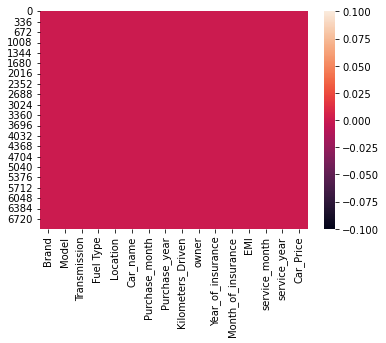

In [112]:
sns.heatmap(data.isnull())

Observation : Here we can see that we have plotted the heatmap fo null-values which is clear with no nullvalues.

In [113]:
data.columns

Index(['Brand', 'Model', 'Transmission', 'Fuel Type', 'Location', 'Car_name',
       'Purchase_month', 'Purchase_year', 'Kilometers_Driven', 'owner',
       'Year_of_insurance', 'Month_of_insurance', 'EMI', 'service_month',
       'service_year', 'Car_Price'],
      dtype='object')

In [114]:
data.dtypes

Brand                 object
Model                 object
Transmission          object
Fuel Type             object
Location              object
Car_name              object
Purchase_month        object
Purchase_year         object
Kilometers_Driven     object
owner                 object
Year_of_insurance     object
Month_of_insurance    object
EMI                   object
service_month         object
service_year          object
Car_Price             object
dtype: object

Observation : Here we have seen that even after extracting the requied adta from the columns and creating the different columns all the datatypes of the column remain same and so we have to change the datatype of the crrated columns.

### Changing the datatypes :

In [115]:
data['Purchase_year'] = data['Purchase_year'].astype('int')

In [116]:
data['Purchase_year'].dtype

dtype('int32')

Observation : Here we have converted the created column "Purchase_year" into "int" datatype.

In [117]:
data['Kilometers_Driven'] = data['Kilometers_Driven'].astype('int')

In [118]:
data['Kilometers_Driven'].dtype

dtype('int32')

Observation : Here we have converted the created column "Kilometers_Driven" into "int" datatype.

In [119]:
data['owner'] = data['owner'].astype('int')

In [120]:
data['owner'].dtype

dtype('int32')

Observation : Here we have converted the created column "owner" into "int" datatype.

In [121]:
data['Year_of_insurance'] = data['Year_of_insurance'].astype('int')

In [122]:
data['Year_of_insurance'].dtype

dtype('int32')

Observation : Here we have converted the created column "Year_of_insurance" into "int" datatype.

In [123]:
data['EMI'] = data['EMI'].astype('int')

In [124]:
data['EMI'].dtype

dtype('int32')

Observation : Here we have converted the created column "EMI" into "int" datatype.

In [125]:
data['service_year'] = data['service_year'].astype('int')

In [126]:
data['service_year'].dtype

dtype('int32')

Observation : Here we have converted the created column "service_year" into "int" datatype.

In [127]:
data['Car_Price'] = data['Car_Price'].astype('int')

In [128]:
data['Car_Price'].dtype

dtype('int32')

Observation : Here we have converted the created column "Car_Price" into "int" datatype

## Checking the datatypes of the columns again:

In [129]:
data.dtypes

Brand                 object
Model                 object
Transmission          object
Fuel Type             object
Location              object
Car_name              object
Purchase_month        object
Purchase_year          int32
Kilometers_Driven      int32
owner                  int32
Year_of_insurance      int32
Month_of_insurance    object
EMI                    int32
service_month         object
service_year           int32
Car_Price              int32
dtype: object

Observation : Here we can see that the columsn have changed their datatypes.

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7039 entries, 0 to 7038
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Brand               7039 non-null   object
 1   Model               7039 non-null   object
 2   Transmission        7039 non-null   object
 3   Fuel Type           7039 non-null   object
 4   Location            7039 non-null   object
 5   Car_name            7039 non-null   object
 6   Purchase_month      7039 non-null   object
 7   Purchase_year       7039 non-null   int32 
 8   Kilometers_Driven   7039 non-null   int32 
 9   owner               7039 non-null   int32 
 10  Year_of_insurance   7039 non-null   int32 
 11  Month_of_insurance  7039 non-null   object
 12  EMI                 7039 non-null   int32 
 13  service_month       7039 non-null   object
 14  service_year        7039 non-null   int32 
 15  Car_Price           7039 non-null   int32 
dtypes: int32(7), object(9)
m

Observation : Here we can see that all our columns are with no null values and with desired datatype.

In [131]:
data

Brand                             Model Transmission Fuel Type  \
0      Maruti                    ['VDI', 'ABS']       MANUAL    Diesel   
1      Maruti                           ['ZDI']       MANUAL    Diesel   
2      Maruti          ['ALPHA', 'DDIS', '190']       MANUAL    Diesel   
3      Maruti          ['ALPHA', 'DDIS', '190']       MANUAL    Diesel   
4      Maruti            ['ZETA', '1.2', 'K12']       MANUAL    Petrol   
...       ...                               ...          ...       ...   
7034   Maruti                           ['LXI']       MANUAL    Petrol   
7035  Hyundai  ['1.2', 'MAGNA', 'PLUS', 'VTVT']       MANUAL    Petrol   
7036    Honda      ['1.2', 'VXMT', 'I', 'VTEC']       MANUAL    Petrol   
7037  Hyundai            ['MAGNA', '1.2', 'MT']       MANUAL    Petrol   
7038  Hyundai        ['Sportz(O)', '1.2', 'MT']       MANUAL    Petrol   

     Location Car_name Purchase_month  Purchase_year  Kilometers_Driven  \
0       DELHI    Swift            Mar             15              76264   
1       DELHI    Swift            Jul             14              92088   
2       DELHI   Baleno            Jan             16              67332   
3       DELHI   Baleno            Nov             15              76135   
4       DELHI   Baleno            Mar             18              37786   
...       ...      ...            ...            ...                ...   
7034    DELHI     Alto            Feb             19              16539   
7035    DELHI                     Jan             19              31962   
7036    DELHI     maze            Sep             20              15472   
7037    DELHI                     Aug             17               6427   
7038    DELHI                     Feb             18              35407   

      owner  Year_of_insurance Month_of_insurance    EMI service_month  \
0         1               2023                Mar   9840           Nov   
1         1               2023                Mar   9710           Mar   
2         1               2022                Jul  13612           Nov   
3         2               2023                Mar  12672           Mar   
4         1               2023                Mar  14546           Feb   
...     ...                ...                ...    ...           ...   
7034      2               2023                Mar      0           Dec   
7035      1               2023                Mar      0           Mar   
7036      1               2023                Mar      0           Dec   
7037      1               2023                Mar      0           Dec   
7038      1               2022                Oct      0           Jan   

      service_year  Car_Price  
0             2021     426499  
1             2022     420799  
2             2021     592199  
3             2022     550899  
4             2022     633199  
...            ...        ...  
7034          2021     365599  
7035          2022     638999  
7036          2021     774999  
7037          2021     631399  
7038          2022     533099  

[7039 rows x 16 columns]

# Visualization :

## Brand :

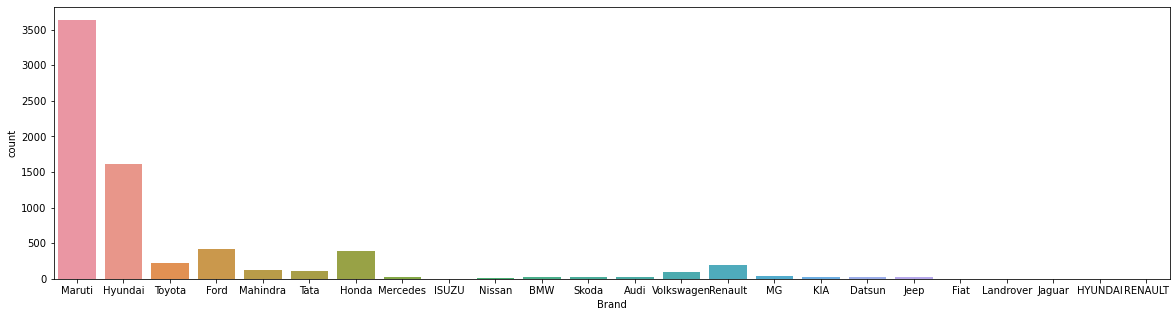

In [132]:
# Brand
plt.figure(figsize=(20,5))
sns.countplot(data.Brand);

Observation : Here we have seen that the column has the highest count for the attribute "Maruti" followed by "Hyundai" and the least count is for "Nissan".

## Model :

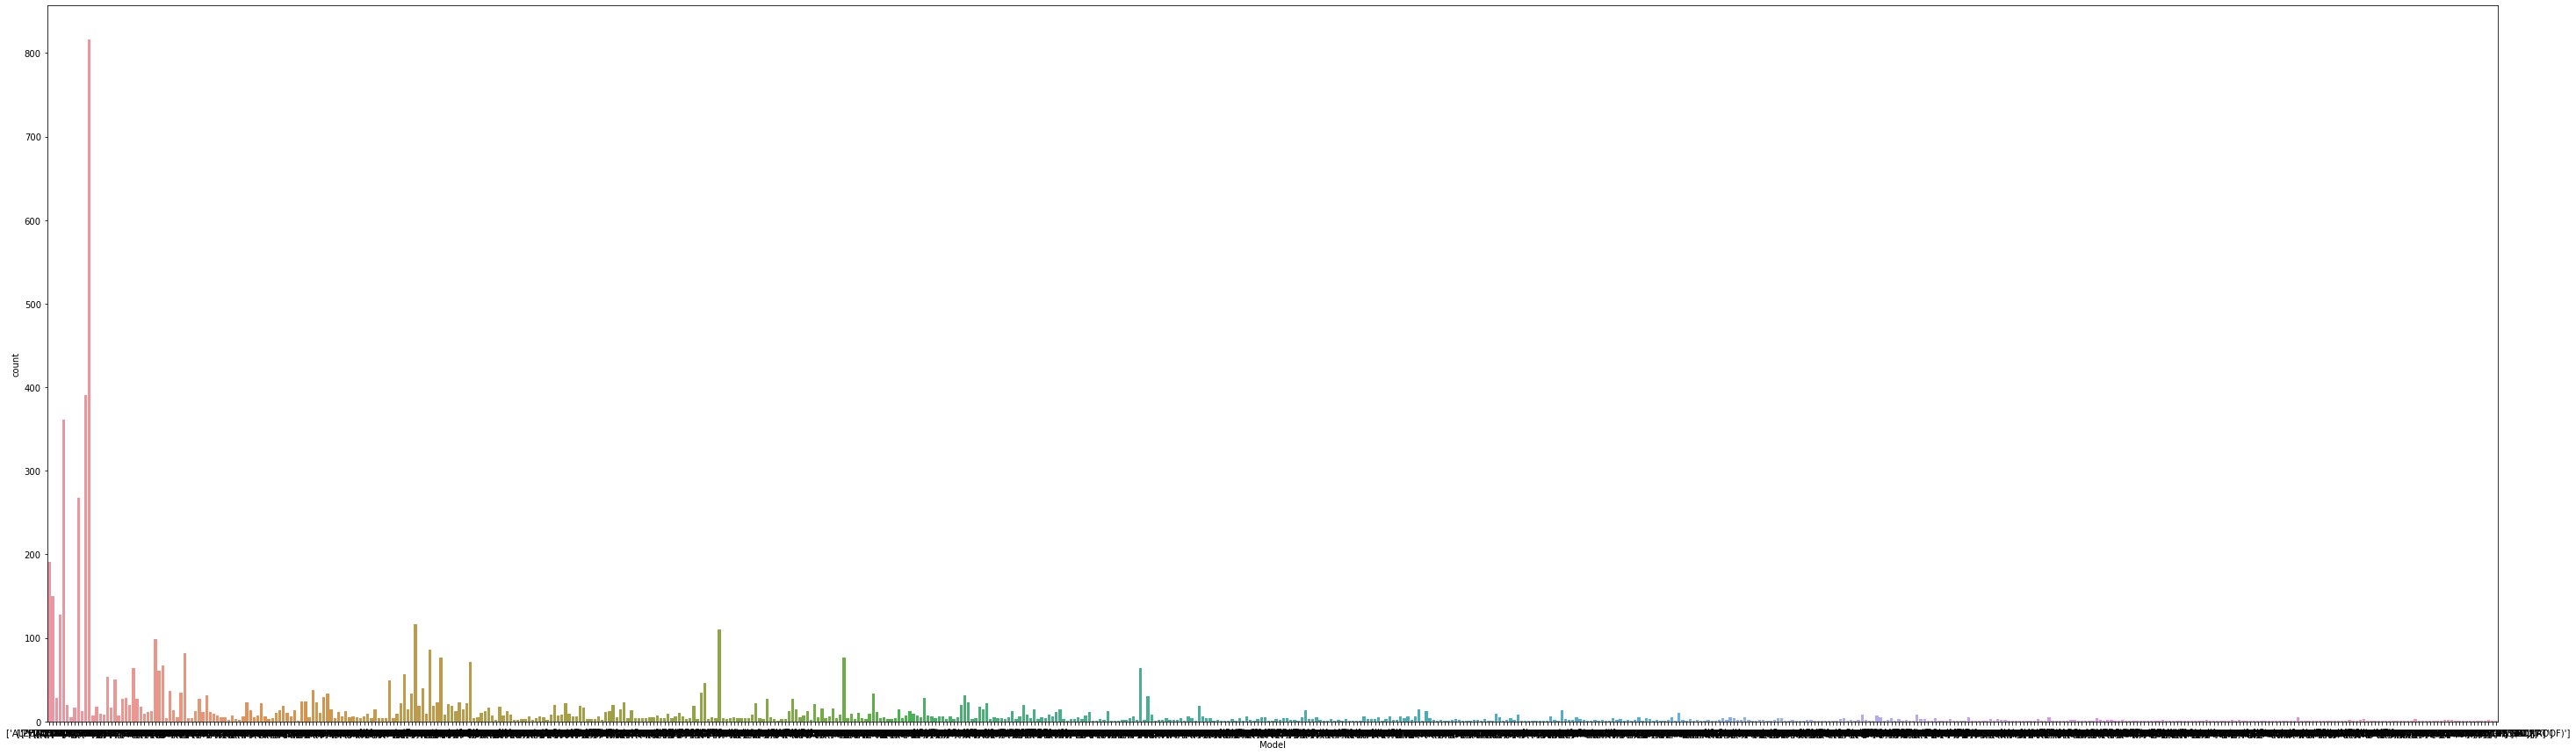

In [133]:
# Model

plt.figure(figsize=(50,15))
sns.countplot(data.Model);

Observation : Here we have seen that the column has multiple models and appropriately only few models are with highest count.

## Transmission :

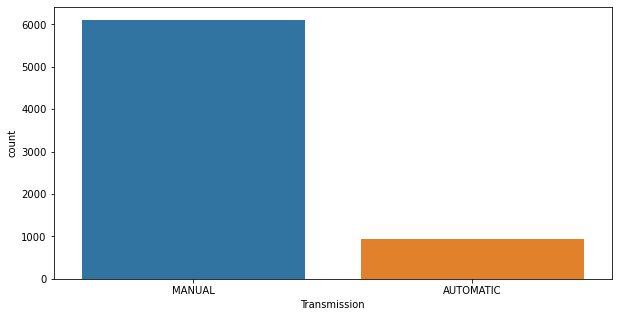

In [134]:
# Transmission
plt.figure(figsize=(10,5))
sns.countplot(data.Transmission);

Observation : here we can see that the column has the highest count for the attribute "Manual" and the least count is for "Automatic".

## Location :

In [135]:
plt.figure(figsize=(20,5),dpi = 100)
sns.countplot(data.Location);

Observation : here we can see that the highest count is for the attribute "Delhi" followed by "Ghaziabad" and the least count is for the category "Noida".

## Car_name :

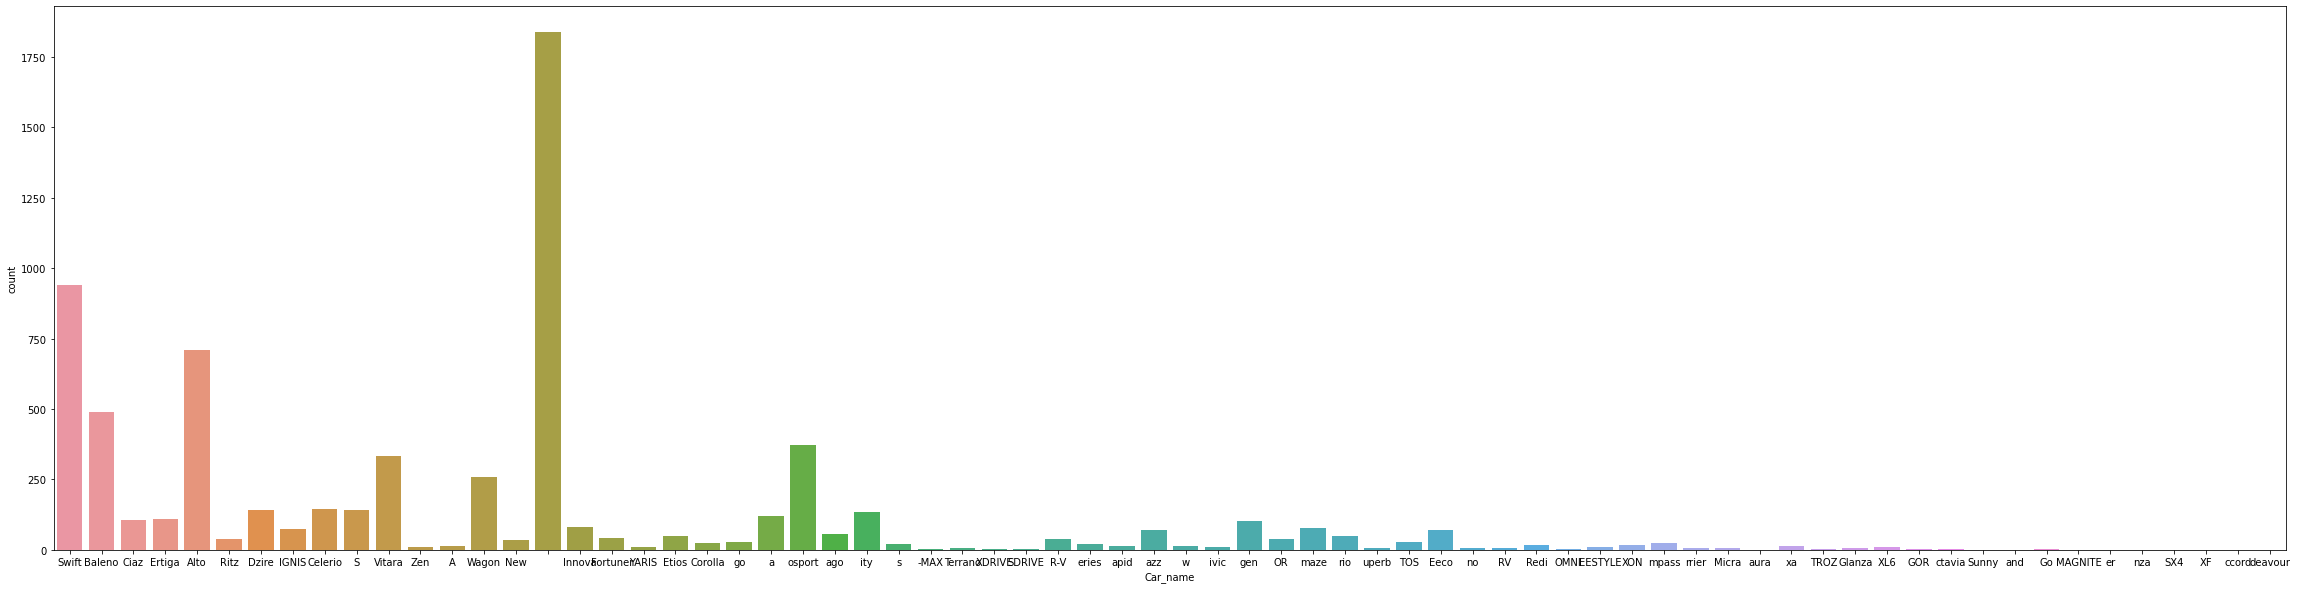

In [136]:
Car_name

plt.figure(figsize=(40,10))
sns.countplot(data.Car_name);


Observation : here we can see that the highest count is for the attribute "Innova" followed by "Swift" and the least count is for thye attribute "Aris".

## Purchase_month :

In [137]:
Purchase_month

plt.figure(figsize=(20,5))
sns.countplot(data.Purchase_month);

Observation : here we can see that the attribute with the highest count in the column is "Jan" followed by "Feb" and the least count is for the attribute "Dec".

## Purchase_year :

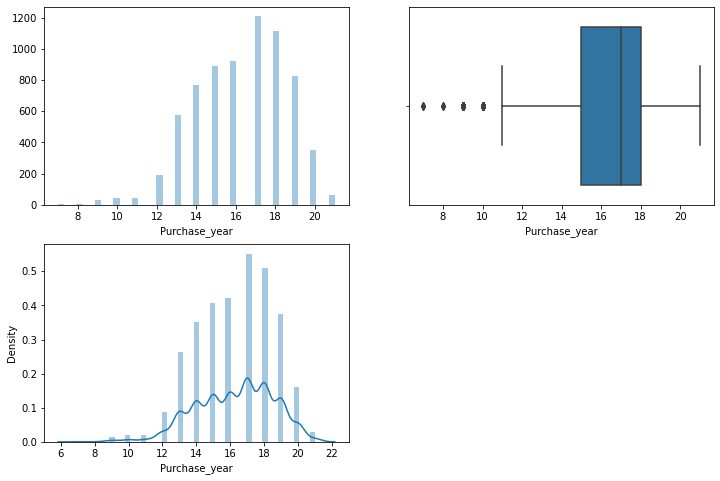

In [138]:
Purchase_year

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(data['Purchase_year'], kde=False);
plt.subplot(2,2,2)
sns.boxplot(data['Purchase_year']);
plt.subplot(2,2,3)
sns.distplot(data['Purchase_year']);


Observation : Here we can see that the column is with multiple peaks and has no normal distribution curve and has outliers in the boxplot

## Kilometers_Driven :

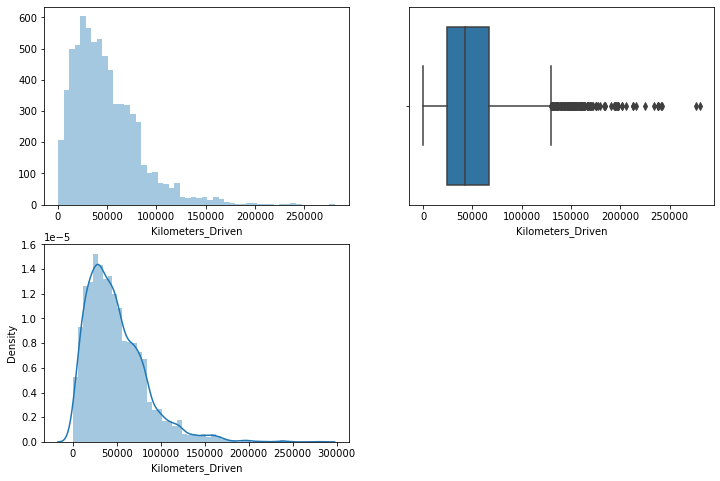

In [139]:
Kilometers_Driven

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(data['Kilometers_Driven'], kde=False);
plt.subplot(2,2,2)
sns.boxplot(data['Kilometers_Driven']);
plt.subplot(2,2,3)
sns.distplot(data['Kilometers_Driven']);

Observation : Here we have seen that the curve is some what skewed towards right and the boxplot has outliers in it.

## owner :

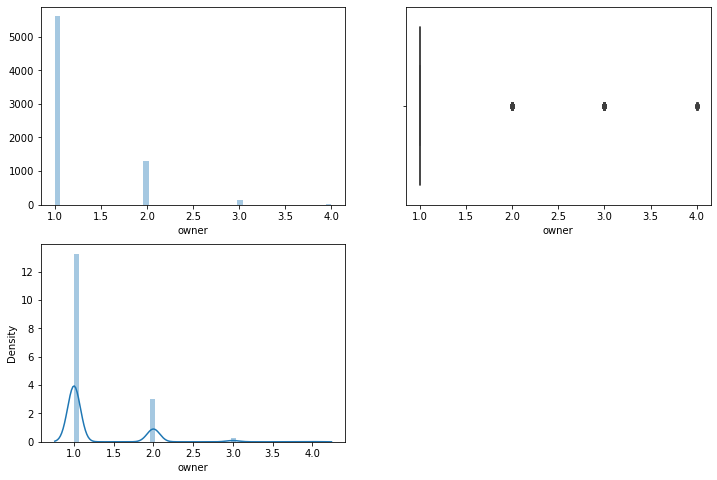

In [140]:
owner

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(data['owner'], kde=False);
plt.subplot(2,2,2)
sns.boxplot(data['owner']);
plt.subplot(2,2,3)
sns.distplot(data['owner']);

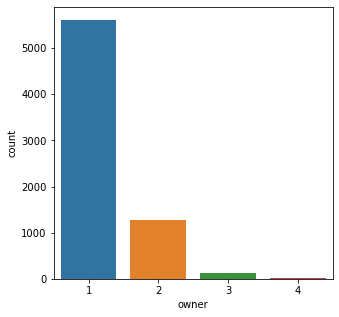

In [141]:
plt.figure(figsize=(5,5))
sns.countplot(data.owner);

Observation : Here we can see that the distribution is not at all normal and the boxplot has outliers but are faraway from eachother and the highest count is for the attribute st owner and the least count for the attribute 4th owner

## Year_of_insurance :

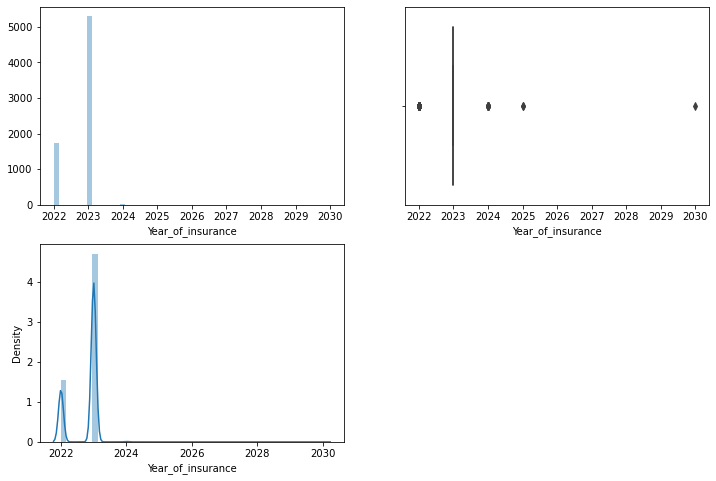

In [142]:
Year_of_insurance

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(data['Year_of_insurance'], kde=False);
plt.subplot(2,2,2)
sns.boxplot(data['Year_of_insurance']);
plt.subplot(2,2,3)
sns.distplot(data['Year_of_insurance']);

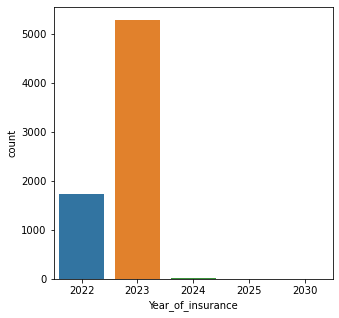

In [143]:
plt.figure(figsize=(5,5))
sns.countplot(data.Year_of_insurance);

Observation : here we can see that the distribution is not at all normal and the boxplot has outliers and the highest count is for the category 2023 and the least count is for the category 2024

## Month_of_insurance :

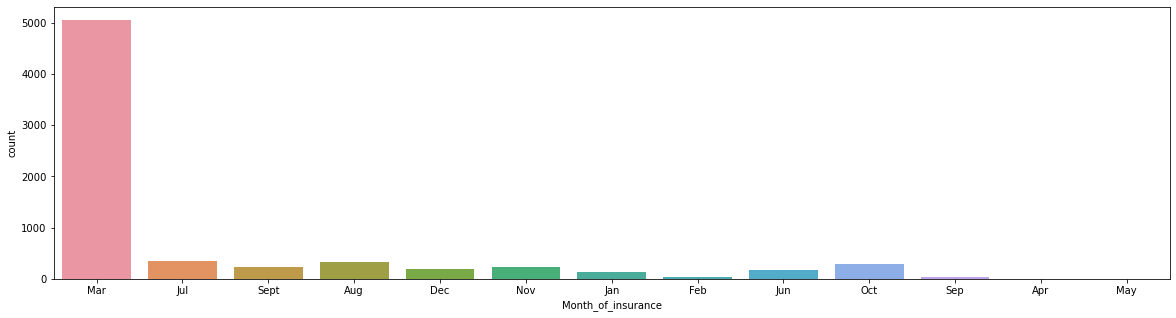

In [144]:
Month_of_insurance

plt.figure(figsize=(20,5))
sns.countplot(data.Month_of_insurance);

Observation : here we can see that the highest count is for thye category "March" and the least count is for the category "Sep"

## EMI :

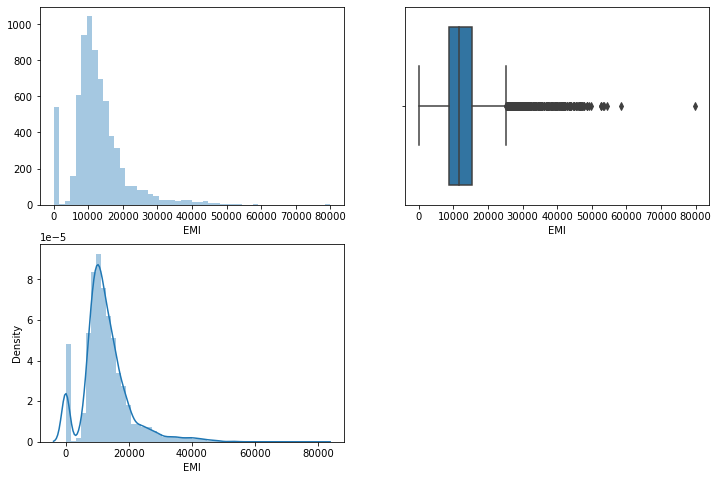

In [145]:
EMI

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(data['EMI'], kde=False);
plt.subplot(2,2,2)
sns.boxplot(data['EMI']);
plt.subplot(2,2,3)
sns.distplot(data['EMI']);

Observation : Here we can see that the distribution curve is with 2 peaks and also is skewed and the boxplot has outliers which are very dense in nature with eachother and we have to treat them ,during outliers treatment for better model accuracy.

## service_month :

In [146]:
service_month

plt.figure(figsize=(20,5))
sns.countplot(data.service_month);

Observation : Here we can see that the column has the highest count for the category "Feb" followed by "Jan" and the least count is for the category "Aug".

## service_year :

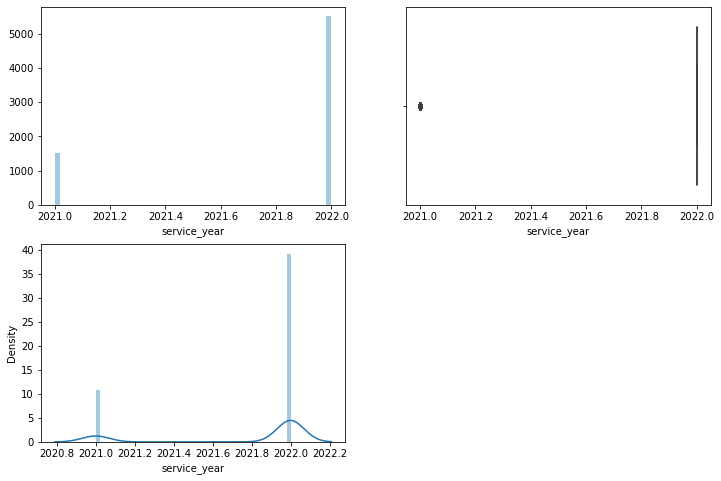

In [147]:
service_year

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(data['service_year'], kde=False);
plt.subplot(2,2,2)
sns.boxplot(data['service_year']);
plt.subplot(2,2,3)
sns.distplot(data['service_year']);

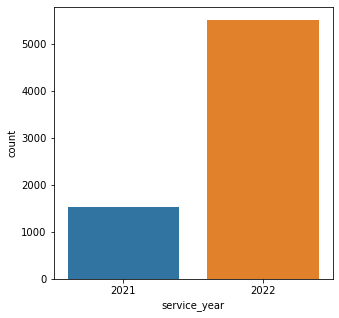

In [148]:
plt.figure(figsize=(5,5))
sns.countplot(data.service_year);


Observation ; Here we can see that the column has the highest count for the category "2022" and least count for "2021".

## Car_Price :

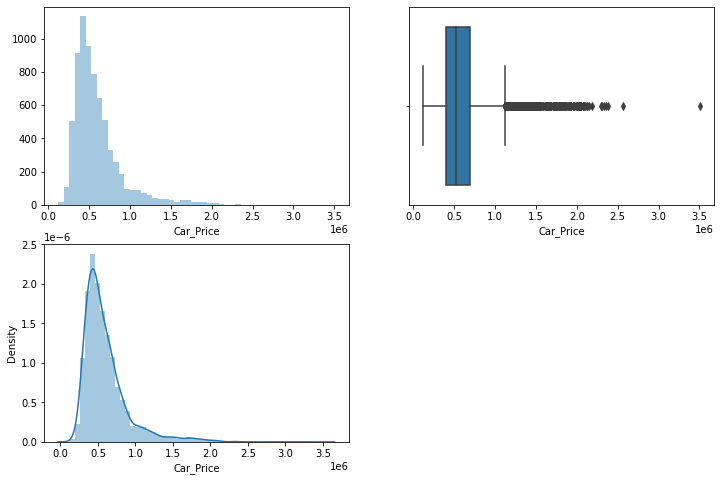

In [149]:
Car_Price

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(data['Car_Price'], kde=False);
plt.subplot(2,2,2)
sns.boxplot(data['Car_Price']);
plt.subplot(2,2,3)
sns.distplot(data['Car_Price']);

Observation : Here we can see that the distribution curve has the sharp peak and is skewed towards right and the boxplot has the dense outliers towards one side of the plot.

## Bivariate :

### Brand with Car_price :

<AxesSubplot:xlabel='Brand', ylabel='Car_Price'>

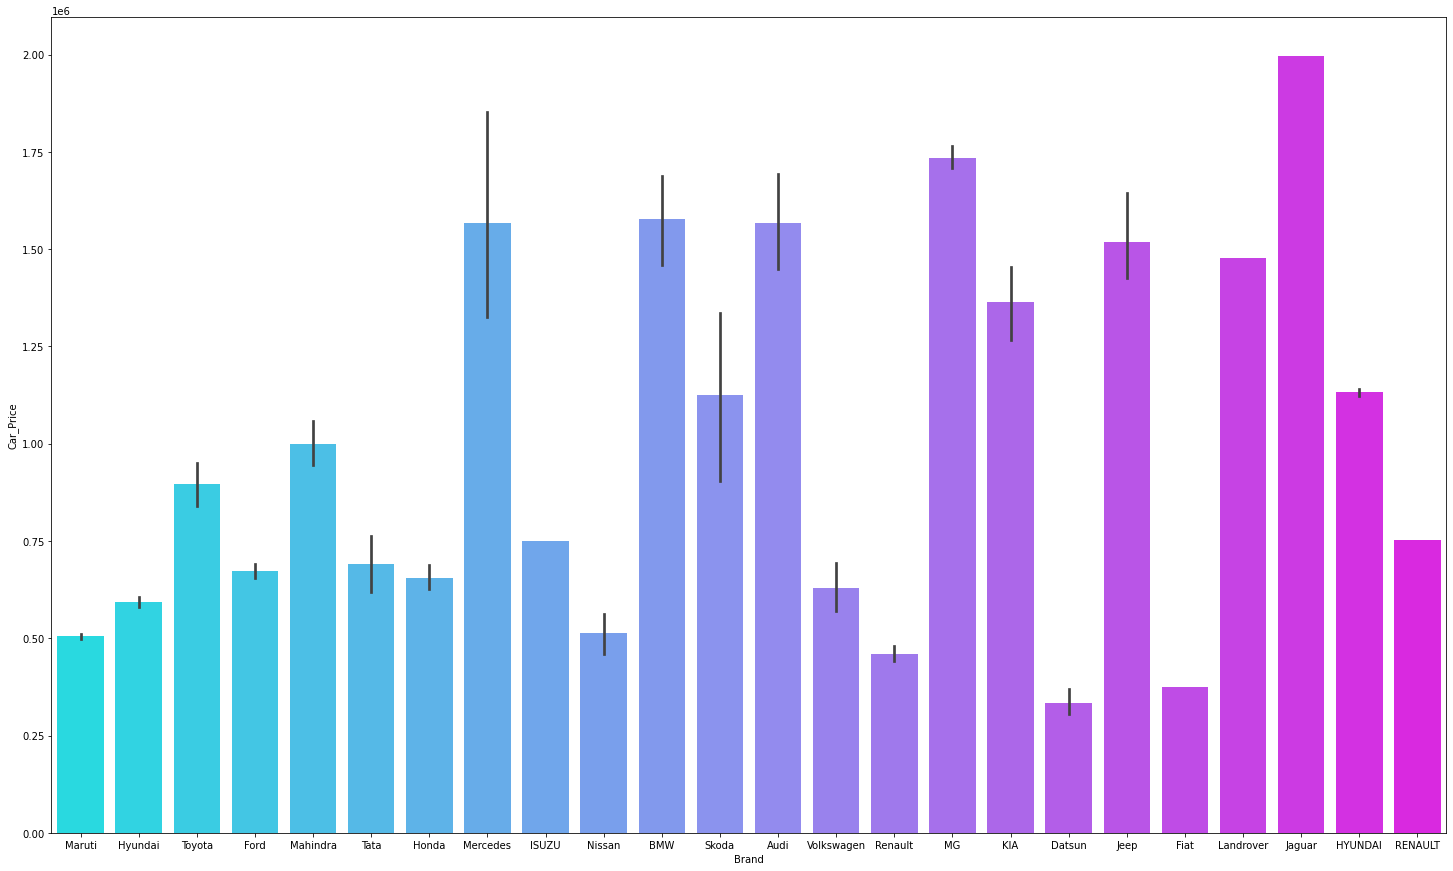

In [150]:
plt.figure(figsize = (25,15))
sns.barplot(x = 'Brand', y = 'Car_Price', data = data, palette = 'cool')

Observation : here we can see that the brand with highest price is "Jaguar" and the least price is "Datsun".

### Model with car_price :

<AxesSubplot:xlabel='Model', ylabel='Car_Price'>

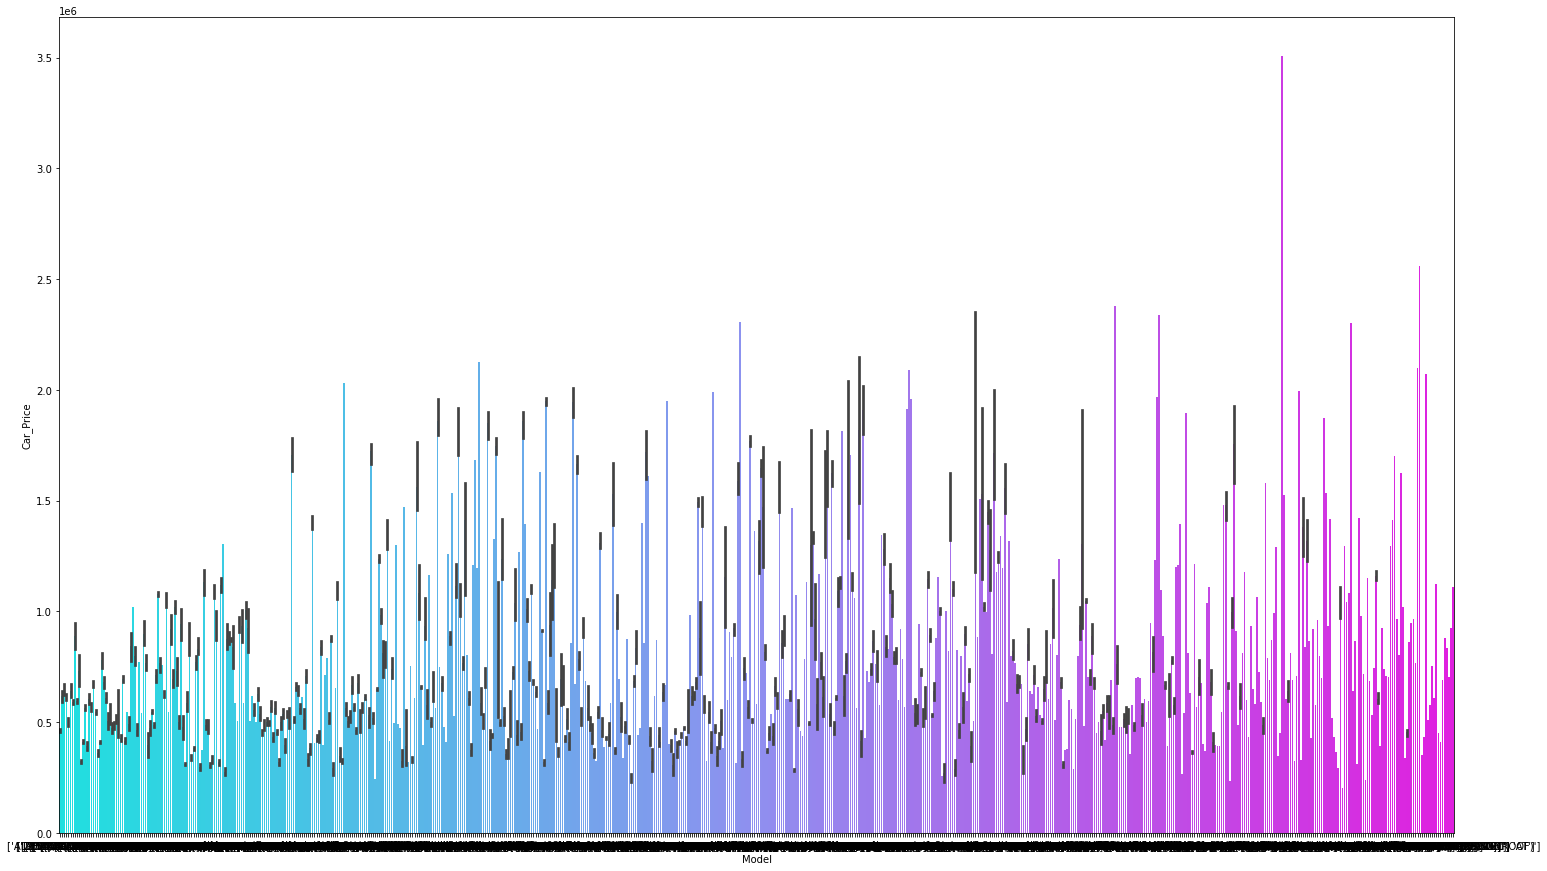

In [151]:
plt.figure(figsize = (25,15))
sns.barplot(x = 'Model', y = 'Car_Price', data = data, palette = 'cool')

Observation : Here we can see that the column has many models of cars with almost similar range of prices and few with high range of price.

### Transmission with car_price :

<AxesSubplot:xlabel='Transmission', ylabel='Car_Price'>

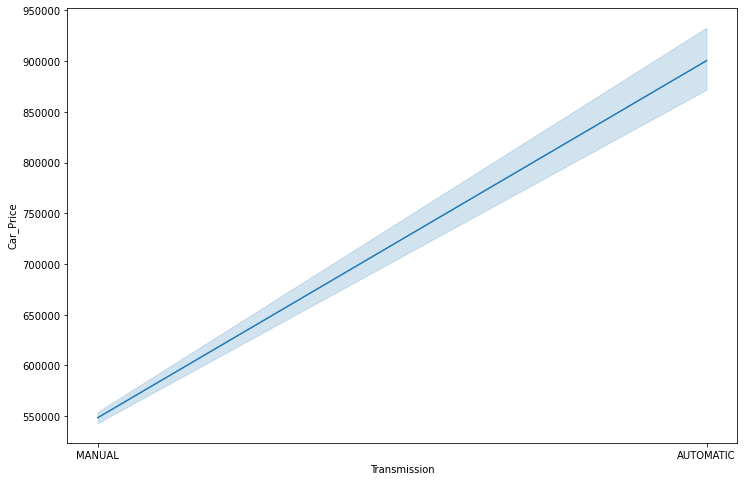

In [153]:
plt.figure(figsize = (12,8))
sns.lineplot(x = 'Transmission', y = 'Car_Price', data = data, palette = 'Blues')

Observation : Here we can see that the highest price is seen for the Automatic category of the column " Transmission".

### Fuel Type with car_price :

<AxesSubplot:xlabel='Fuel Type', ylabel='Car_Price'>

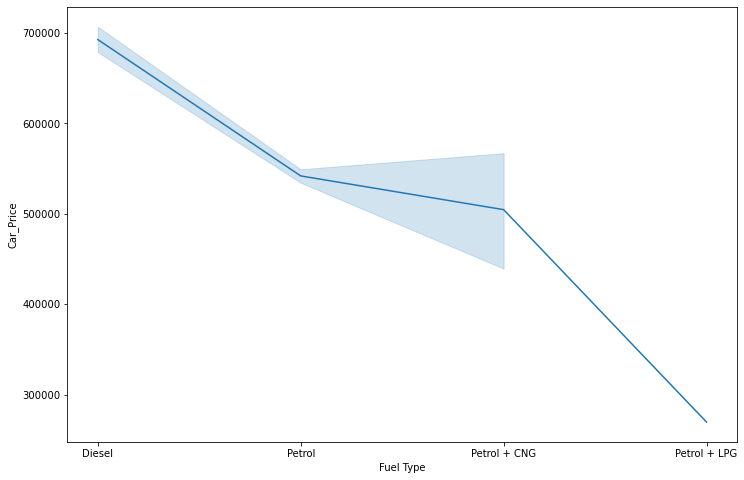

In [154]:
#Fuel Type

plt.figure(figsize = (12,8))
sns.lineplot(x = 'Fuel Type', y = 'Car_Price', data = data, palette = 'Blues')


Observation : here we can see that the highest price is for the category "Diesel" and the least price is for the category "Petrol + LPG"

### Location with car_price :

<AxesSubplot:xlabel='Location', ylabel='Car_Price'>

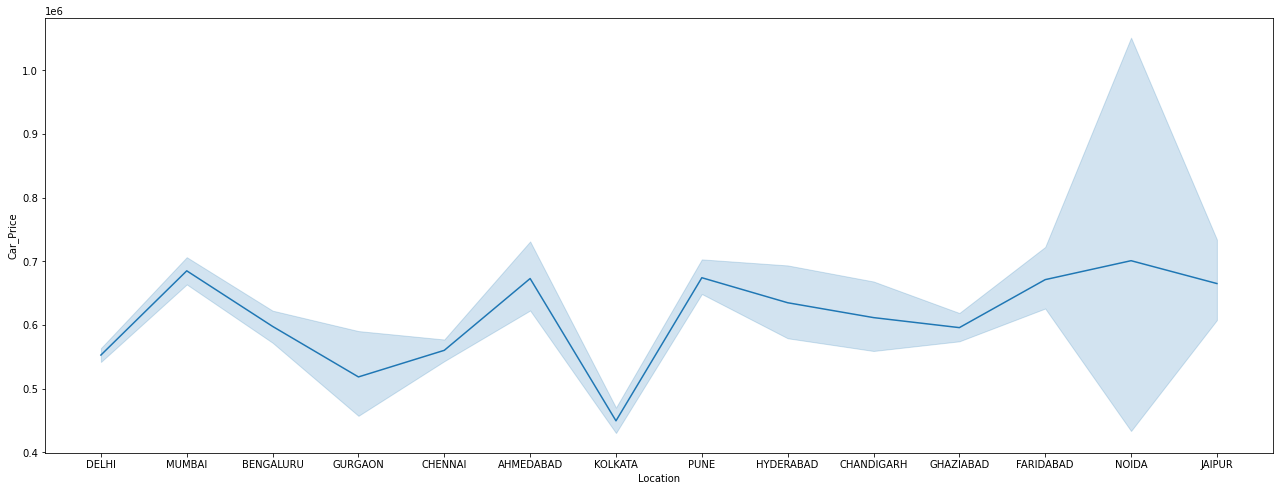

In [155]:
#Location

plt.figure(figsize = (22,8))
sns.lineplot(x = 'Location', y = 'Car_Price', data = data, palette = 'Blues')

Observation : here we can see that all the locations the car_price is almost similar .

### Car_name with car_price :

In [156]:
# Car_name

plt.figure(figsize = (42,20),dpi = 500)
sns.lineplot(x = 'Car_name', y = 'Car_Price', data = data, palette = 'Blues')

<AxesSubplot:xlabel='Car_name', ylabel='Car_Price'>

Observation : Here we can see that the highest car_price is for the category XF,Cardeavour and most of them have similar price ranges.

### Purchase_month with car_price :

<AxesSubplot:xlabel='Purchase_month', ylabel='Car_Price'>

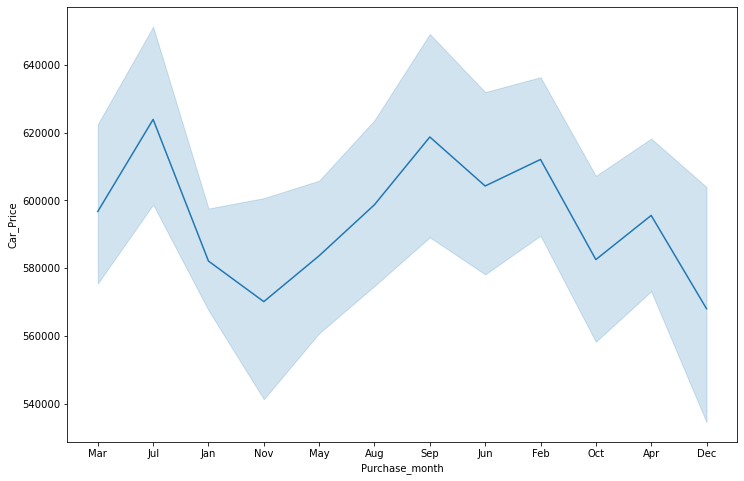

In [157]:
# Purchase_month

plt.figure(figsize = (12,8))
sns.lineplot(x = 'Purchase_month', y = 'Car_Price', data = data, palette = 'Blues')

Observation : here we can see that the column has the highest price for the category "jul" with 620000 and the least is for the category "Dec".

### Purchase_year with Car_Price :

<AxesSubplot:xlabel='Purchase_year', ylabel='Car_Price'>

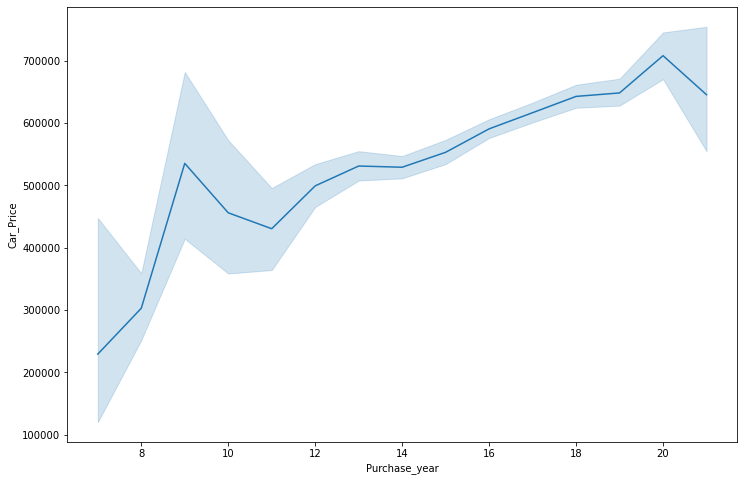

In [158]:
plt.figure(figsize = (12,8))
sns.lineplot(x = 'Purchase_year', y = 'Car_Price', data = data, palette = 'Blues')

Observation ; here we can see that the column has the highest price for the category "20" and the least price for the category below "8".

### Kilometers_Driven with Car_Price :

<AxesSubplot:xlabel='Kilometers_Driven', ylabel='Car_Price'>

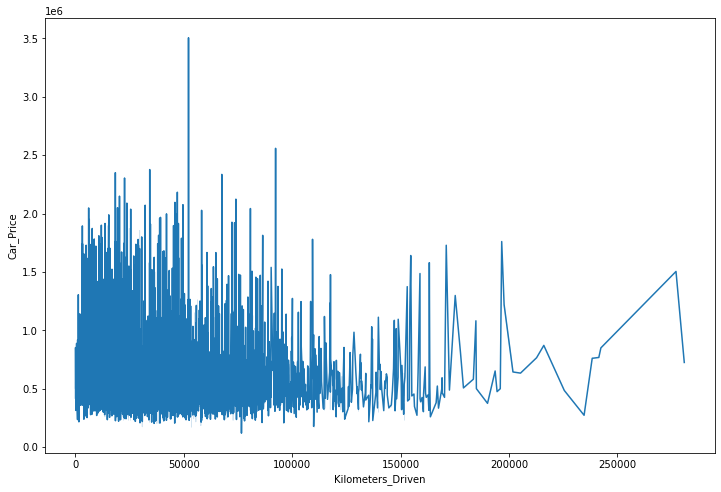

In [159]:
# Kilometers_Driven

plt.figure(figsize = (12,8))
sns.lineplot(x = 'Kilometers_Driven', y = 'Car_Price', data = data, palette = 'Blues')

Observation : Here we can see that the highest price is for the category 50000 Kilometers driven and there is more density in the range between 0 - 100000 kilometers driven.

### owner with Car_price :

<AxesSubplot:xlabel='owner', ylabel='Car_Price'>

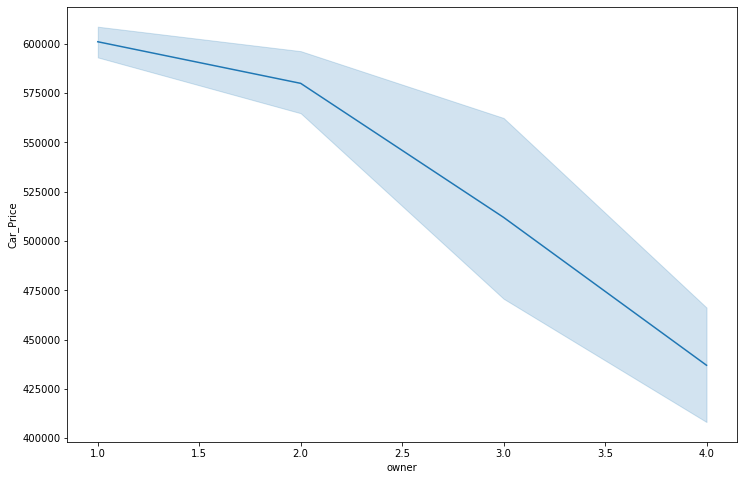

In [160]:
# owner 

plt.figure(figsize = (12,8))
sns.lineplot(x = 'owner', y = 'Car_Price', data = data, palette = 'Blues')

Observation : Here we can see that the highest price is for the category 1st owner with a price range of 600000 and the least price is for the category 4th owner

### Year_of_insurance with Car_Price :

<AxesSubplot:xlabel='Year_of_insurance', ylabel='Car_Price'>

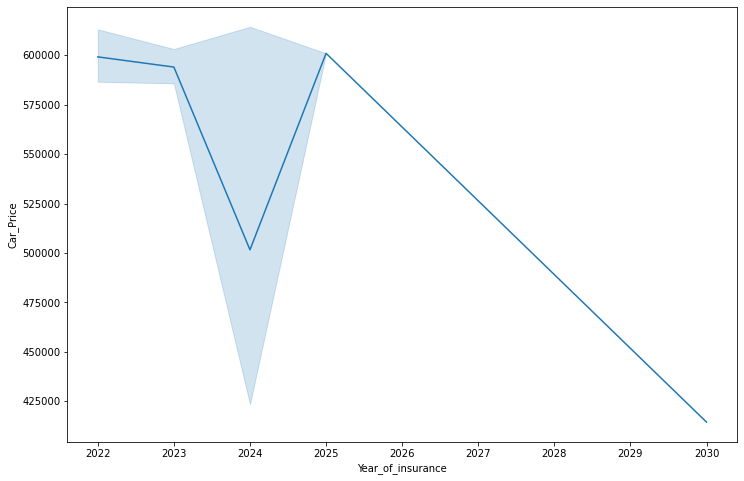

In [161]:
# Year_of_insurance:

plt.figure(figsize = (12,8))
sns.lineplot(x = 'Year_of_insurance', y = 'Car_Price', data = data, palette = 'Blues')

Observation : Here we can see that the highest price is for the categories ranging between 2022 - 2025 with price of 600000 and the least price is for the category 2030 with a price of 425000

### Month_of_insurance with Car_Price :

<AxesSubplot:xlabel='Month_of_insurance', ylabel='Car_Price'>

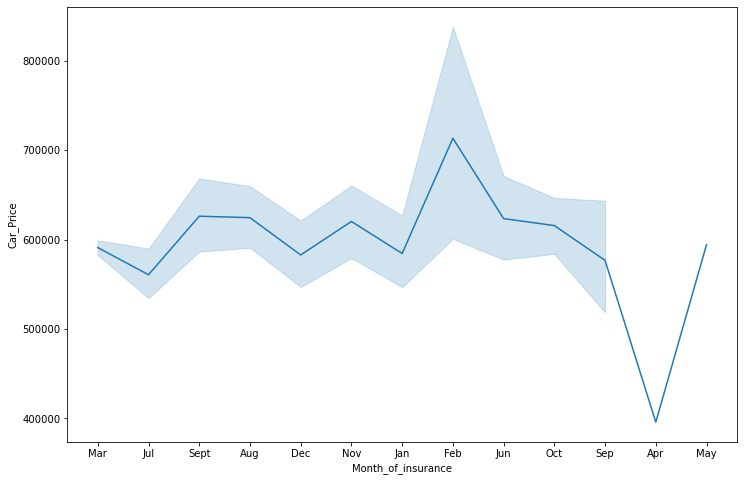

In [162]:
plt.figure(figsize = (12,8))
sns.lineplot(x = 'Month_of_insurance', y = 'Car_Price', data = data, palette = 'Blues')

Observation : Here we can see that the highest price is for the category "Feb" with a price of 700000 and the least price is for the category "April" with price range of 400000.

### EMI with Car_Price :

<AxesSubplot:xlabel='EMI', ylabel='Car_Price'>

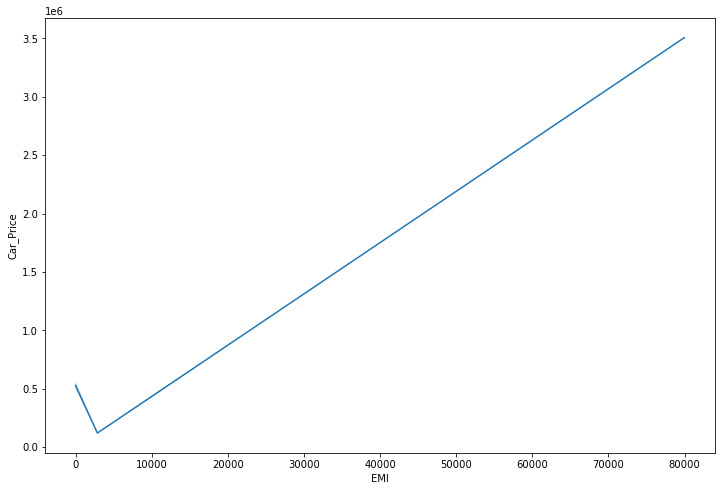

In [164]:
# EMI 

plt.figure(figsize = (12,8))
sns.lineplot(x = 'EMI', y = 'Car_Price', data = data, palette = 'Blues')

Observation : Here we can see that the column has the highest price for the category 80000(EMI) and the least price is for almost "0" EMI.

### service_month with Car_Price :

<AxesSubplot:xlabel='service_month', ylabel='Car_Price'>

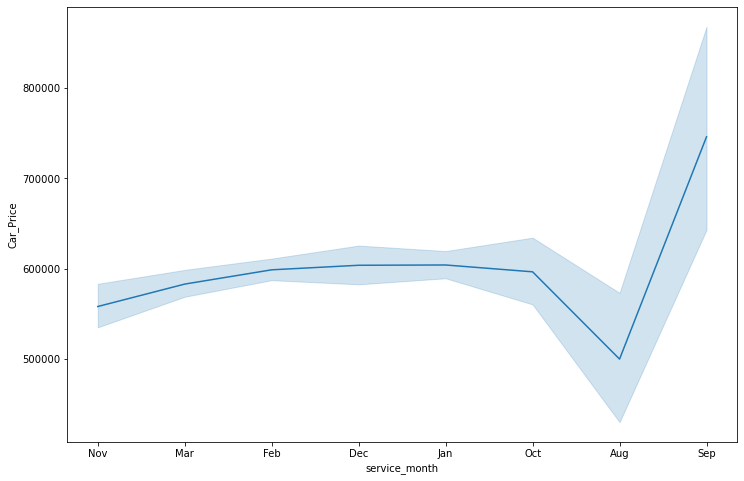

In [165]:
plt.figure(figsize = (12,8))
sns.lineplot(x = 'service_month', y = 'Car_Price', data = data, palette = 'Blues')

Observation : Here we can see that the highest price is for the category "Sep" with price ranging between 700000 - 800000 and the least price is for the category "Aug" with a price range below 500000

### service_year with Car_Price :

<AxesSubplot:xlabel='service_year', ylabel='Car_Price'>

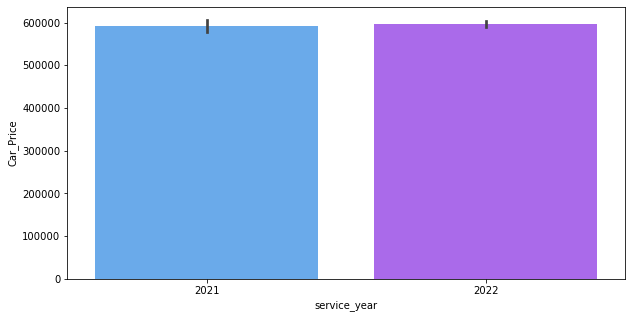

In [167]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'service_year', y = 'Car_Price', data = data, palette = 'cool')

Observation : Here we can see that the categories present in the column are almost at the same price range almost at 600000

<AxesSubplot:xlabel='service_year', ylabel='Car_Price'>

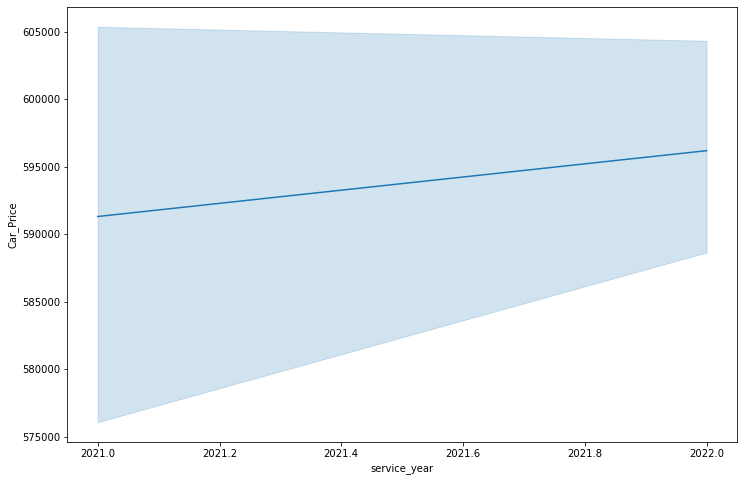

In [166]:
# service_year

plt.figure(figsize = (12,8))
sns.lineplot(x = 'service_year', y = 'Car_Price', data = data, palette = 'Blues')

## Correlation :

In [168]:
corr = data.corr()

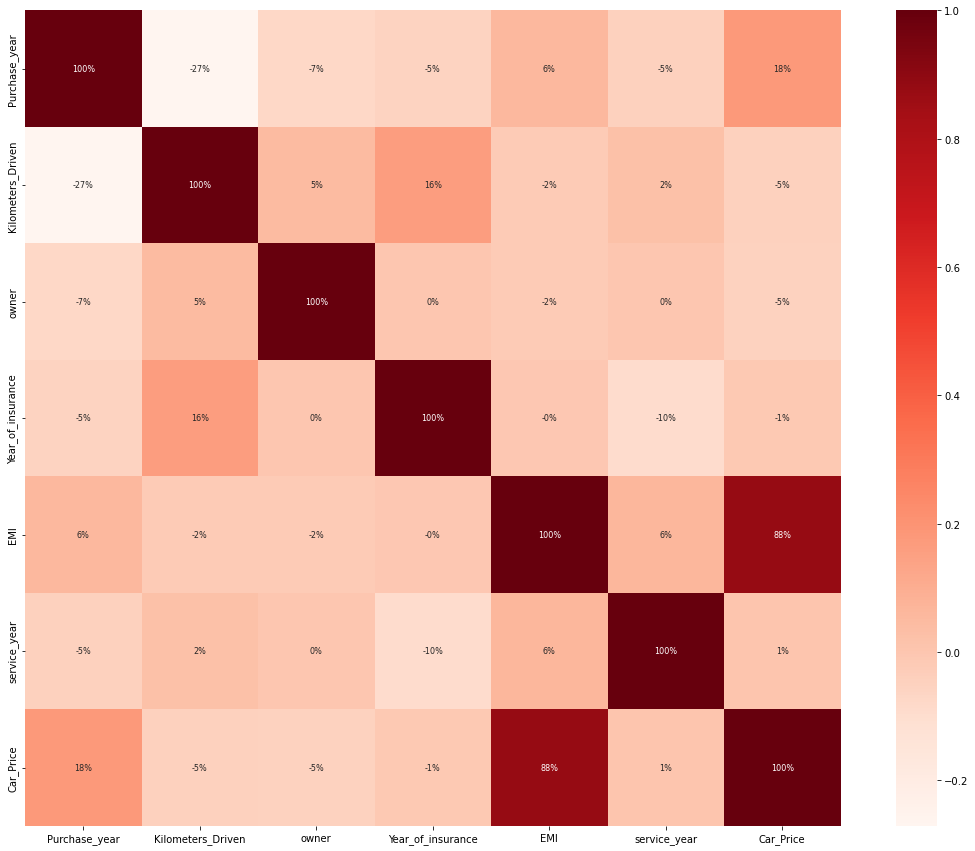

In [169]:
plt.figure(figsize = (20,15))
sns.heatmap(corr,annot = True,fmt = ".0%",cbar = True,square = True,annot_kws = {'size':8}, cmap = 'Reds')
plt.show()

Observation : Here we can see that the highest correlation of our label column is with column "EMI" and the rest all are not very highly correlated. 

### Before checking for the outliers we have to encode the columns present in the data.

## Checking the outliers :

In [170]:
from sklearn.preprocessing import LabelEncoder

Observation : Here we have imported the "LabelEncoder" for encoding the data.

In [171]:
for column in data.columns:
    if data[column].dtype == np.number:
        continue
    data[column] = LabelEncoder().fit_transform(data[column])
        

Here we have used for loop to encode the complete data ie., all the column of the data.

In [172]:
data.head()

Brand  Model  Transmission  Fuel Type  Location  Car_name  Purchase_month  \
0     15    528             1          0         4        32               7   
1     15    626             1          0         4        32               5   
2     15    227             1          0         4         4               4   
3     15    227             1          0         4         4               9   
4     15    633             1          1         4         4               7   

   Purchase_year  Kilometers_Driven  owner  Year_of_insurance  \
0              8               3712      0                  1   
1              7               4006      0                  1   
2              9               3463      0                  0   
3              8               3706      1                  1   
4             11               2122      0                  1   

   Month_of_insurance   EMI  service_month  service_year  Car_Price  
0                   7   756              5             0        850  
1                   7   722              4             1        814  
2                   5  1569              5             0       1729  
3                   7  1391              4             1       1542  
4                   7  1748              2             1       1917

Observation : Here we can see that we have encoded all the columns of the data.

In [173]:
col_list = data.columns.values
ncol = 30
nrows = 12
plt.figure(figsize = (ncol,3*ncol))
for i in range (0, len(col_list)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data = data[col_list[i]],color = 'green', orient = 'v')
    plt.tight_layout()

Observation : Here we can see that there are few columns which have outliers which are to be treated further for better model accuracy.

### Here for removing the outliers we use Z-Score method :

## Removing the Outliers :

In [174]:
from scipy.stats import zscore
z = np.abs(zscore(data))
z.shape

(7039, 16)

In [175]:
threshold = 3
print(np.where(z>3))

(array([  47,   80,   83,  178,  215,  291,  315,  346,  355,  370,  382,
        533,  550,  550,  622,  623,  646,  735,  788,  819,  854,  854,
        855,  862,  905,  962, 1001, 1011, 1016, 1091, 1116, 1125, 1135,
       1198, 1199, 1210, 1212, 1300, 1319, 1324, 1379, 1420, 1430, 1468,
       1765, 1795, 1797, 1839, 1846, 1889, 1900, 1901, 1902, 1905, 1937,
       1944, 1945, 1962, 1964, 1965, 1974, 2008, 2009, 2022, 2055, 2066,
       2079, 2088, 2102, 2122, 2142, 2159, 2159, 2224, 2230, 2304, 2309,
       2327, 2413, 2641, 2716, 2825, 2832, 2847, 2865, 2870, 2899, 2903,
       2948, 2961, 2971, 2974, 3012, 3016, 3023, 3063, 3080, 3095, 3095,
       3177, 3234, 3264, 3271, 3311, 3318, 3333, 3333, 3355, 3363, 3406,
       3449, 3471, 3508, 3519, 3570, 3584, 3648, 3850, 4049, 4192, 4215,
       4219, 4261, 4264, 4269, 4273, 4283, 4325, 4341, 4361, 4393, 4397,
       4409, 4428, 4451, 4465, 4481, 4488, 4490, 4498, 4542, 4561, 4562,
       4605, 4657, 4666, 4692, 4725, 4727, 4735, 4

In [176]:
data_new = data[(z<3).all(axis = 1)]
print(data.shape)
print(data_new.shape)

(7039, 16)
(6823, 16)


Observation : Here we can see that the data has reduced because the number of records got reduced from 7039 to 6823 that means we nhave been successful in treating the outliers.

In [224]:
data_new

Brand  Model  Transmission  Fuel Type  Location  Car_name  \
0        15    528      0.386809          0 -0.399267  0.832017   
1        15    626      0.386809          0 -0.399267  0.832017   
2        15    227      0.386809          0 -0.399267 -0.473861   
3        15    227      0.386809          0 -0.399267 -0.473861   
4        15    633      0.386809          1 -0.399267 -0.473861   
...     ...    ...           ...        ...       ...       ...   
7034     15    372      0.386809          1 -0.399267 -0.605666   
7035      7     33      0.386809          1 -0.399267 -1.334339   
7036      6     65      0.386809          1 -0.399267  1.327245   
7037      7    380      0.386809          1 -0.399267 -1.334339   
7038      7    493      0.386809          1 -0.399267 -1.334339   

      Purchase_month  Purchase_year  Kilometers_Driven     owner  \
0                  7              8               3712 -0.477769   
1                  5              7               4006 -0.477769   
2                  4              9               3463 -0.477769   
3                  9              8               3706  2.093064   
4                  7             11               2122 -0.477769   
...              ...            ...                ...       ...   
7034               3             12                747  2.093064   
7035               4             12               1768 -0.477769   
7036              11             13                683 -0.477769   
7037               1             10                195 -0.477769   
7038               3             11               1995 -0.477769   

      Year_of_insurance  Month_of_insurance   EMI  service_month  \
0              0.528474            0.060240   756              5   
1              0.528474            0.060240   722              4   
2             -1.662682           -0.929743  1569              5   
3              0.528474            0.060240  1391              4   
4              0.528474            0.060240  1748              2   
...                 ...                 ...   ...            ...   
7034           0.528474            0.060240     0              1   
7035           0.528474            0.060240     0              4   
7036           0.528474            0.060240     0              1   
7037           0.528474            0.060240     0              1   
7038          -1.662682            1.791497     0              3   

      service_year  Car_Price  
0        -1.916582        850  
1         0.521762        814  
2        -1.916582       1729  
3         0.521762       1542  
4         0.521762       1917  
...            ...        ...  
7034     -1.916582        503  
7035      0.521762       1941  
7036     -1.916582       2413  
7037     -1.916582       1909  
7038      0.521762       1447  

[6823 rows x 16 columns]

## Checking the data loss :

In [178]:
data_loss = (7039-6823)/7039*100

In [179]:
data_loss

3.0686177013780367

Observation : Here we can see that the loss% is 3% which means that we have lost 3% of the data which is negligible.

## Checking the Skewness :

In [180]:
data_new.skew()

Brand                -0.211438
Model                -0.517917
Transmission         -2.198933
Fuel Type            -0.488661
Location              0.627048
Car_name              0.690795
Purchase_month        0.116671
Purchase_year        -0.263006
Kilometers_Driven    -0.106703
owner                 1.615650
Year_of_insurance    -1.125474
Month_of_insurance   -0.722223
EMI                   0.233340
service_month         0.489505
service_year         -1.395127
Car_Price             0.225423
dtype: float64

In [181]:
data_new.skew().sort_values()

Transmission         -2.198933
service_year         -1.395127
Year_of_insurance    -1.125474
Month_of_insurance   -0.722223
Model                -0.517917
Fuel Type            -0.488661
Purchase_year        -0.263006
Brand                -0.211438
Kilometers_Driven    -0.106703
Purchase_month        0.116671
Car_Price             0.225423
EMI                   0.233340
service_month         0.489505
Location              0.627048
Car_name              0.690795
owner                 1.615650
dtype: float64

Observation : Here we can see that we have columns which have the combination of positive skewness and negative skewness which have to be treated for better model accuracy.

### Here we will remove the skewness though Power transformer method .

## Removing the skewness :

In [185]:
features = ["Transmission","service_year","Year_of_insurance","Month_of_insurance","Location","owner","Car_name"]

Observation : Here we have mentioned the features which have skewness and assigned them to a variable which is to be passed during tranforming method

In [186]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [187]:
data_new[features] = scaler.fit_transform(data_new[features].values)
data_new[features]

Transmission  service_year  Year_of_insurance  Month_of_insurance  \
0         0.386809     -1.916582           0.528474            0.060240   
1         0.386809      0.521762           0.528474            0.060240   
2         0.386809     -1.916582          -1.662682           -0.929743   
3         0.386809      0.521762           0.528474            0.060240   
4         0.386809      0.521762           0.528474            0.060240   
...            ...           ...                ...                 ...   
7034      0.386809     -1.916582           0.528474            0.060240   
7035      0.386809      0.521762           0.528474            0.060240   
7036      0.386809     -1.916582           0.528474            0.060240   
7037      0.386809     -1.916582           0.528474            0.060240   
7038      0.386809      0.521762          -1.662682            1.791497   

      Location     owner  Car_name  
0    -0.399267 -0.477769  0.832017  
1    -0.399267 -0.477769  0.832017  
2    -0.399267 -0.477769 -0.473861  
3    -0.399267  2.093064 -0.473861  
4    -0.399267 -0.477769 -0.473861  
...        ...       ...       ...  
7034 -0.399267  2.093064 -0.605666  
7035 -0.399267 -0.477769 -1.334339  
7036 -0.399267 -0.477769  1.327245  
7037 -0.399267 -0.477769 -1.334339  
7038 -0.399267 -0.477769 -1.334339  

[6823 rows x 7 columns]

In [188]:
data_new.skew()

Brand                -0.211438
Model                -0.517917
Transmission         -2.198933
Fuel Type            -0.488661
Location             -0.025383
Car_name             -0.118866
Purchase_month        0.116671
Purchase_year        -0.263006
Kilometers_Driven    -0.106703
owner                 1.615650
Year_of_insurance    -0.142321
Month_of_insurance    0.241816
EMI                   0.233340
service_month         0.489505
service_year         -1.395127
Car_Price             0.225423
dtype: float64

Observation : Here we can see that the skewness of the columns are treated and lthe skewness values have changed ie., which are decreased

## Separating the variables into independent and target variables  :

In [189]:
x = data_new.drop("Car_Price", axis=1)
y = data_new["Car_Price"]

### Here we have separated the data among the 2 variables x and y in which the label column is assigned with the variable "y" and the rest all the features are assigned to the variable "x".

In [190]:
x.head()

Brand  Model  Transmission  Fuel Type  Location  Car_name  Purchase_month  \
0     15    528      0.386809          0 -0.399267  0.832017               7   
1     15    626      0.386809          0 -0.399267  0.832017               5   
2     15    227      0.386809          0 -0.399267 -0.473861               4   
3     15    227      0.386809          0 -0.399267 -0.473861               9   
4     15    633      0.386809          1 -0.399267 -0.473861               7   

   Purchase_year  Kilometers_Driven     owner  Year_of_insurance  \
0              8               3712 -0.477769           0.528474   
1              7               4006 -0.477769           0.528474   
2              9               3463 -0.477769          -1.662682   
3              8               3706  2.093064           0.528474   
4             11               2122 -0.477769           0.528474   

   Month_of_insurance   EMI  service_month  service_year  
0            0.060240   756              5     -1.916582  
1            0.060240   722              4      0.521762  
2           -0.929743  1569              5     -1.916582  
3            0.060240  1391              4      0.521762  
4            0.060240  1748              2      0.521762

In [191]:
y.head()

0     850
1     814
2    1729
3    1542
4    1917
Name: Car_Price, dtype: int64

### Here we use the Standard Scaler for Scaling the data present in the variable "x"

## Scaling the data using the standard Scaler :

In [192]:
from sklearn.preprocessing import StandardScaler

In [193]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

Brand     Model  Transmission  Fuel Type  Location  Car_name  \
0     0.523717  0.712809      0.386809  -1.326706 -0.399267  0.832017   
1     0.523717  1.249793      0.386809  -1.326706 -0.399267  0.832017   
2     0.523717 -0.936500      0.386809  -1.326706 -0.399267 -0.473861   
3     0.523717 -0.936500      0.386809  -1.326706 -0.399267 -0.473861   
4     0.523717  1.288149      0.386809   0.722211 -0.399267 -0.473861   
...        ...       ...           ...        ...       ...       ...   
6818  0.523717 -0.141983      0.386809   0.722211 -0.399267 -0.605666   
6819 -1.067519 -1.999510      0.386809   0.722211 -0.399267 -1.334339   
6820 -1.266424 -1.824168      0.386809   0.722211 -0.399267  1.327245   
6821 -1.067519 -0.098147      0.386809   0.722211 -0.399267 -1.334339   
6822 -1.067519  0.521029      0.386809   0.722211 -0.399267 -1.334339   

      Purchase_month  Purchase_year  Kilometers_Driven     owner  \
0           0.541421      -0.595678           1.127095 -0.477769   
1          -0.069227      -1.047017           1.361512 -0.477769   
2          -0.374551      -0.144339           0.928558 -0.477769   
3           1.152069      -0.595678           1.122311  2.093064   
4           0.541421       0.758340          -0.140671 -0.477769   
...              ...            ...                ...       ...   
6818       -0.679875       1.209679          -1.237010  2.093064   
6819       -0.374551       1.209679          -0.422929 -0.477769   
6820        1.762718       1.661018          -1.288039 -0.477769   
6821       -1.290523       0.307001          -1.677140 -0.477769   
6822       -0.679875       0.758340          -0.241933 -0.477769   

      Year_of_insurance  Month_of_insurance       EMI  service_month  \
0              0.528474            0.060240 -0.567419       1.694795   
1              0.528474            0.060240 -0.607956       0.897526   
2             -1.662682           -0.929743  0.401891       1.694795   
3              0.528474            0.060240  0.189668       0.897526   
4              0.528474            0.060240  0.615306      -0.697011   
...                 ...                 ...       ...            ...   
6818           0.528474            0.060240 -1.468770      -1.494280   
6819           0.528474            0.060240 -1.468770       0.897526   
6820           0.528474            0.060240 -1.468770      -1.494280   
6821           0.528474            0.060240 -1.468770      -1.494280   
6822          -1.662682            1.791497 -1.468770       0.100257   

      service_year  
0        -1.916582  
1         0.521762  
2        -1.916582  
3         0.521762  
4         0.521762  
...            ...  
6818     -1.916582  
6819      0.521762  
6820     -1.916582  
6821     -1.916582  
6822      0.521762  

[6823 rows x 15 columns]

Observation : Here we have scaled the data of our "x" ie., all our features are scaled.

## Model Building :

In [194]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Observation : Here we have imported the libraries required .

## Checking the random_state:

In [195]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = LinearRegression()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.8569831256498824  on Random_state  7


Observation : Here we have checked the random state from 1 to 200 where we got the R2 Score as 85.6% at the random_state 7.

## splitting the data at the "maxRs" = 7 :

In [196]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

Observation : Here we can see that we splitted the data into train and test data with test_size as 30% and the max_random_state as 7

## Regression Algorithms :

In [197]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn import metrics

Observation : Here we can see that we have imported the necessary libraries to train and test the model.

## Linear Regression :

In [198]:
# Checking r2score for Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)

# prediction
predLR=LR.predict(x_test)
print('R2_score:',metrics.r2_score(y_test,predLR))

R2_score: 0.8569831256498824


In [199]:
# Mean Absolute Error (MAE)

print(metrics.mean_absolute_error(y_test, predLR))

# Mean Squared Error (MSE)
print(metrics.mean_squared_error(y_test, predLR))

# Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test, predLR)))

188.33710470714834
106638.76215756004
326.5559096962724


Observation : Here we can see that we have achieved 85.6% accuracy with Linear regression model

## Random Forest Regressor:

In [200]:
#Checking R2 score for Random Forest Regressor:

RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,predRFR))

R2_Score: 0.984098786719313


In [201]:
# Mean Absolute Error (MAE)
print(metrics.mean_absolute_error(y_test, predRFR))

# Mean Squared Error (MSE)
print(metrics.mean_squared_error(y_test, predRFR))

# Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test, predRFR)))

19.886629213483147
11856.542864338055
108.88775350946521


Observation : Here we can see that we have achieved 98.4% for Random Forest Regressor model

## Decision Tree Regressor :

In [202]:
# Checking R2 score for Decision Tree Regressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)

# prediction
predDTR=DTR.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,predDTR))

R2_Score: 0.9739385316014878


In [203]:
# Mean Absolute Error (MAE)
print(metrics.mean_absolute_error(y_test, predDTR))

# Mean Squared Error (MSE)
print(metrics.mean_squared_error(y_test, predDTR))

# Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test, predDTR)))

24.37420615534929
19432.411333659013
139.400184123476


Observation : Here we have seen that we have achieved 97.3% accuracy with Decision Tree Regressor model.

## KNN regressor :

In [204]:
# Checking R2 score for KNN regressor

knn=KNN()
knn.fit(x_train,y_train)

#prediction
predknn=knn.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,predknn))

R2_Score: 0.781359340265938


In [205]:
# Mean Absolute Error (MAE)
print(metrics.mean_absolute_error(y_test, predknn))

# Mean Squared Error (MSE)
print(metrics.mean_squared_error(y_test, predknn))

# Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test, predknn)))


289.6653639472399
163026.70169027845
403.76565194463785


Observation : here we can see that we have achieved 78% accuracy with KNN Regressor model

## Support Vector Regressor :

In [206]:
# Checking R2 score for Support Vector regressor
svr=SVR()
svr.fit(x_train,y_train)

#prediction
predsvr=svr.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,predsvr))

R2_Score: 0.18080738202335167


In [207]:
# Mean Absolute Error (MAE)
print(metrics.mean_absolute_error(y_test, predsvr))

# Mean Squared Error (MSE)
print(metrics.mean_squared_error(y_test, predsvr))

# Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test, predsvr)))

657.1059152179918
610820.8359789883
781.5502773200125


Observation : Here we can see that we have achieved 18% accuracy itself with SVM model

## Checking the Cross Validation Score :

In [208]:
from sklearn.model_selection import cross_val_score

In [209]:
# Checking cv score for Linear Regression
print(cross_val_score(LR,x,y,cv=5).mean())

0.7836850757481711


In [210]:
# Checking cv score for Random Forest Regression
print(cross_val_score(RFR,x,y,cv=5).mean())

0.9709442195306274


In [211]:
# Checking cv score for Decision Tree Regression
print(cross_val_score(DTR,x,y,cv=5).mean())

0.9616810327158174


In [212]:
# Checking cv score for KNN Regression
print(cross_val_score(knn,x,y,cv=5).mean())

0.7384108581236906


In [213]:
# Checking cv score for SVR Regression
print(cross_val_score(svr,x,y,cv=5).mean())

0.16907344146603795


Observation : Here we can see that among all the models Random Forest Regressor has high CV Score

### Here we select Random Forest model for Hyper Parameter Tuning

## Hyper parameter Tuning :

In [214]:
from sklearn.model_selection import GridSearchCV

In [215]:
#RandomForestRegressor

parameters = {'criterion':['mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[0,200],
             'max_depth':[2,4,6]}

In [216]:
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [217]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 4, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 200]})

In [218]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 200}

In [219]:
Cars_model = RandomForestRegressor(criterion='mse', max_depth=6, max_features='auto', n_estimators=200)
Cars_model.fit(x_train, y_train)
pred = Cars_model.predict(x_test)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, predRFR)))
print('R2_Score:',r2_score(y_test,pred)*100)

RMSE value: 108.88775350946521
R2_Score: 97.2158311996941


Observation : Here we can see that our best model is Random Forest model and the model is with 98.4% accuracy before hyper parameter tuning and got reduced after hyper parameter tuning.

## Saving the model :

In [220]:
# Saving the model using .pkl
import pickle
filename='Cars.pkl'
pickle.dump(RFR,open(filename,'wb'))

Observation : Here we have saved our model with ".pkl" method

## Conclusion :

In [221]:
loaded_model=pickle.load(open('Cars.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.984098786719313


In [222]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred[:]],index=["Predicted","Original"])

In [223]:
conclusion

0          1            2           3           4     \
Predicted  2425.020000  69.710000  3149.900000  139.430000  336.400000   
Original   2421.658752  67.948279  3139.124703  137.966309  337.625356   

                 5           6            7           8           9     \
Predicted  235.020000  728.640000  2412.190000  129.690000  394.730000   
Original   208.709865  708.647486  2409.178936  104.423996  376.550029   

                 10           11           12          13          14    \
Predicted  1385.07000  2455.570000  1843.020000  2557.30000  843.220000   
Original   1388.81832  2460.830035  1840.090827  2563.34484  830.165181   

                  15           16          17          18           19    \
Predicted  2455.280000  1456.830000  483.460000  607.010000  1980.110000   
Original   2460.830035  1461.732713  460.820253  587.167725  1990.120427   

                 20           21           22          23           24    \
Predicted  968.580000  2672.130000  1887.750000  216.120000  1112.160000   
Original   946.051436  2668.824483  1892.573507  208.709865  1111.015313   

                  25          26          27          28          29    \
Predicted  2927.300000  429.810000  648.060000  242.830000  839.740000   
Original   2924.121093  432.692771  646.789912  211.639189  824.285695   

                 30          31           32         33          34    \
Predicted  947.870000  1709.87000  2745.430000   3.160000  181.960000   
Original   926.369907  1711.03743  2742.618585  69.774554  208.709865   

                  35           36        37          38           39    \
Predicted  2422.470000  2367.990000  906.7300  709.960000  1615.940000   
Original   2419.289143  2369.239676  920.9007  706.568865  1620.363087   

                  40          41          42           43           44    \
Predicted  1311.180000  2224.69000  723.020000  1563.090000  2624.910000   
Original   1312.359494  2228.31711  706.568865  1556.619275  2619.589841   

                  45           46           47           48           49    \
Predicted  2027.590000  2597.940000  1754.610000  1876.330000  1025.200000   
Original   2031.846906  2601.291685  1755.700952  1883.305117  1021.181313   

                  50          51           52          53           54    \
Predicted  1460.030000  173.030000  2090.170000  670.830000  1849.580000   
Original   1462.412797  208.709865  2089.421312  699.991777  1847.833035   

                 55           56           57           58           59    \
Predicted  105.180000  1475.000000  1611.290000  1906.630000  2966.930000   
Original    67.948279  1470.560772  1613.458449  1852.771655  2972.019943   

                 60           61           62           63          64    \
Predicted  611.790000  3003.810000  1038.470000  2845.260000  650.940000   
Original   590.811661  3011.748931  1040.948885  2845.791994  649.711925   

                  65           66           67           68           69    \
Predicted  1983.810000  2580.900000  1031.040000  1705.120000  2545.900000   
Original   1991.603563  2575.290458  1027.051559  1708.152799  2545.727282   

                  70           71          72           73          74    \
Predicted  2870.540000  1882.600000  826.650000  2035.050000  404.940000   
Original   2867.774407  1888.727089  817.273426  2036.300249  402.474871   

                  75           76          77          78           79    \
Predicted  1513.980000  1546.510000  637.610000  808.060000  1245.520000   
Original   1512.715573  1548.910439  626.569259  815.531449  1247.358982   

                  80           81          82         83           84    \
Predicted  2396.120000  2302.680000  406.680000  96.520000  1336.720000   
Original   2397.424697  2303.041671  408.935332  67.948279  1336.012522   

                 85           86           87          88           89    \
Predicted  712.270000  1733.010000  1483.030000  546.190000  1693.940000 

Observation : Here we have finally presented the Predicted and original values of our data.

## So, our best model is Random Forest model with accuracy% of 98.4%